In [1]:
#daubechie 2

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
import pywt
import scipy
from scipy import integrate
import scipy.integrate
from sympy import *

$$
\sigma^2_{\Omega} = \int_{-\infty}^{\infty} |\frac{dx(t)}{dt}|^2 dt \\
\sigma^2_{t}= \int_{-\infty}^{\infty} |t^2x^2(t)| dt
$$
Taking Dual of this, we get:
$$
\sigma^2_{t} = \int_{-\infty}^{\infty} |\frac{d\hat{x}(\Omega)}{d\Omega}|^2 d\Omega \\
\sigma^2_{\Omega}= \int_{-\infty}^{\infty} |\Omega^2\hat{x}^2(\Omega)| d\Omega
$$
$$
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} \frac{1}{2} H_0\left(e^{\frac{j\Omega}{2^l}}\right)\\
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} \frac{1}{2} \left(1+e^{\frac{-j\Omega}{2^l}}\right)\\
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} \frac{1}{2} \left(1+cos(\frac{\Omega}{2^l})-jsin(\frac{\Omega}{2^l})\right)\\
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} \frac{1}{2}. 2cos(\frac{\Omega}{2^{l+1}}) \left(cos(\frac{\Omega}{2^{l+1}})-jsin(\frac{\Omega}{2^{l+1}})\right)\\
$$
$$
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}}) \left(cos(\frac{\Omega}{2^{l+1}})-jsin(\frac{\Omega}{2^{l+1}})\right)\\
$$
Since,
$$
\left|cos(\frac{\Omega}{2^{l+1}})-jsin(\frac{\Omega}{2^{l+1}})\right|=1\\
|\hat{\Phi}(\Omega)|= |\hat{\Phi}(0)|. \prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}})\\
\prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}})= cos(\frac{\Omega}{2^{2}}). cos(\frac{\Omega}{2^{3}})....cos(\frac{\Omega}{2^{l+1}})\\
\prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}})= cos(\frac{\Omega}{2^{2}}). cos(\frac{\Omega}{2^{3}})....cos(\frac{\Omega}{2^{l+1}}).\frac{sin(\frac{\Omega}{2^{l+1}})}{sin(\frac{\Omega}{2^{l+1}})}\\
\prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}})= \frac{sin(\frac{\Omega}{2})}{2^{l}sin(\frac{\Omega}{2^{l+1}})}
$$
Thus,
$$
|\hat{\Phi}(\Omega)|= |\hat{\Phi}(0)|. \frac{sin(\frac{\Omega}{2})}{2^{l}sin(\frac{\Omega}{2^{l+1}})} \\
$$

# Question 1

In [15]:
def convo(x,y,n):
    for i in range(n):
        x=np.repeat(x,2)
        x[1::2]=0
        x=np.convolve(x,y,mode="full")
    return x

In [71]:
def fil_of_size(n):
    a= 'db'+str(n)
    wavelet=pywt.Wavelet(a)
    b=wavelet.filter_bank[0]
    h=np.zeros(2*n)
    h_a=np.zeros(2*n)
    h_high=np.zeros(2*n)
    for i in range(2*n):
        h[i]=b[2*n-1-i]
        h_a[i]=b[2*n-1-i]
        h_high[i]=b[i]
    ans=convo(h,h_a,10)
    h_high[1::2]=-h_high[1::2]
    k=ans.shape[0]
    t1=np.arange(0.0,1.0,1/k)*k/(2**11)
    ans2=convo(h_high,h_a,10)
    k2=ans2.shape[0]
    t2=np.arange(0.0,1.0,1/k2)*k2/(2**11)
    return (t1,t2,ans,ans2)

In [72]:
t1,t2,haar_low,haar_high=fil_of_size(1)

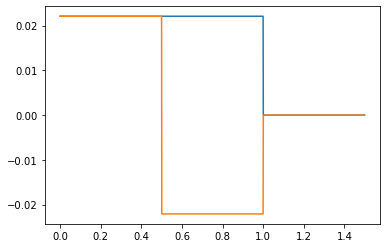

In [73]:
plt.plot(t1,haar_low)
plt.plot(t2,haar_high)

In [74]:
daub9=pywt.Wavelet('db30').filter_bank[0]
daub_9=pywt.Wavelet('db30').filter_bank[1]

In [75]:
from scipy.signal import freqz

In [76]:
d9=freqz(daub9)
d_9=freqz(daub_9)

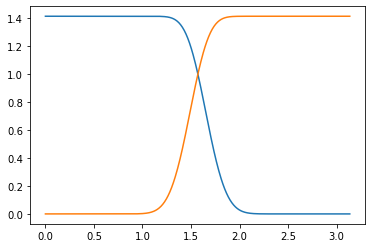

In [77]:
plt.plot(d9[0],np.abs(d9[1]))
plt.plot(d_9[0],np.abs(d_9[1]))

In [340]:
def scal_wav_filter_ft(n):
    t,th,low,high=fil_of_size(int(n/2))
    t1=np.zeros(len(low))
    th1=np.zeros(len(high))
    for i in range(len(t1)):
        t1[i]=t[i]
    for i in range(len(th1)):
        th1[i]=th[i]
    a='db'+str(int(n/2))
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(t1,low,label='Scaling length '+str(n))
    plt.plot(th1,high,label='Wavelet length '+str(n))
    plt.title("Wavelet and Scaling functions length "+str(n))
    plt.xlabel("Time")
    plt.ylabel("Magnitude")
    plt.legend()
    fil=pywt.Wavelet(a).filter_bank[0]
    fil_1=pywt.Wavelet(a).filter_bank[1]
    filx=freqz(fil)
    fil_x=freqz(fil_1)
    plt.subplot(1,2,2)
    plt.plot(filx[0],np.abs(filx[1]),label='Scaling LPF length '+str(n))
    plt.plot(fil_x[0],np.abs(fil_x[1]),label='Wavelet HPF length '+str(n))
    plt.title("Fourier Transform of Wavelet and Scaling functions length " + str(n))
    plt.xlabel("Frequency: 0 to Pi")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.show()

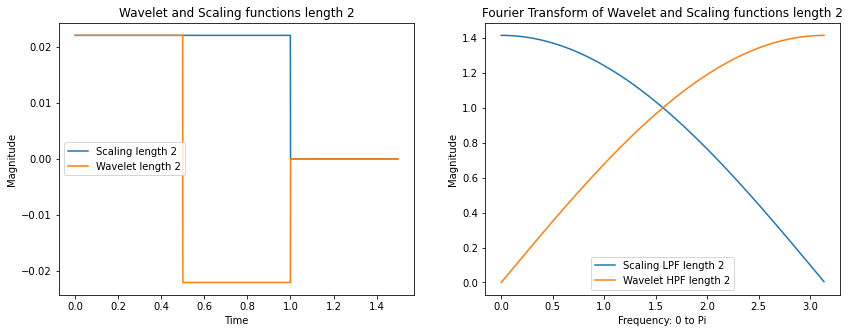

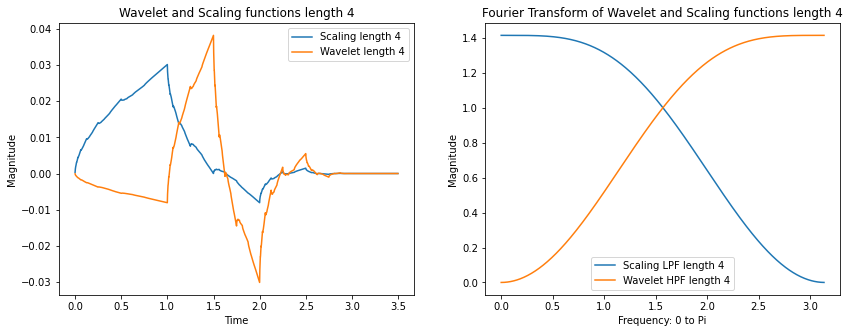

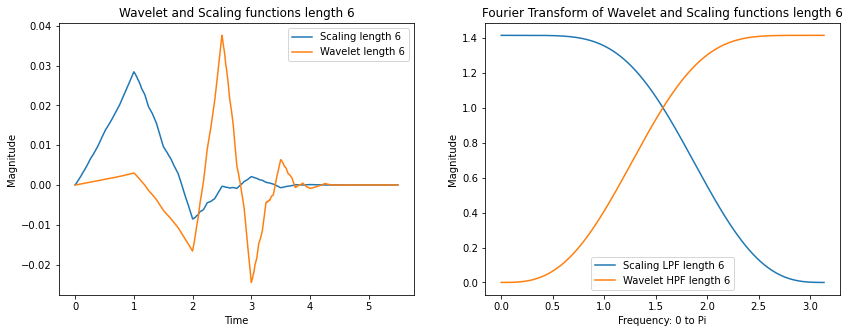

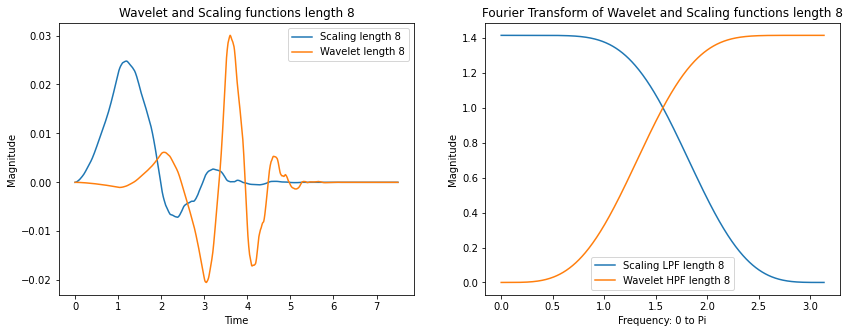

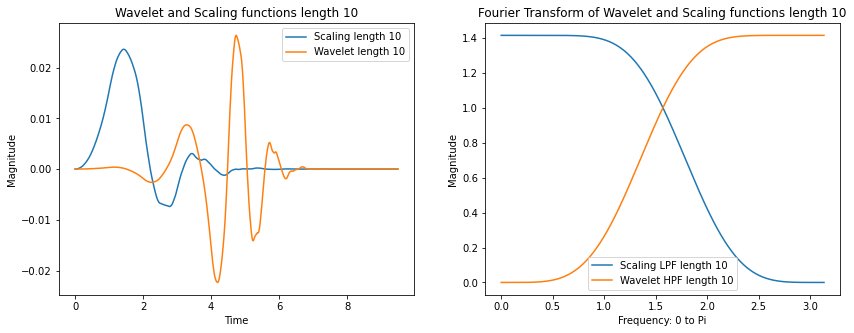

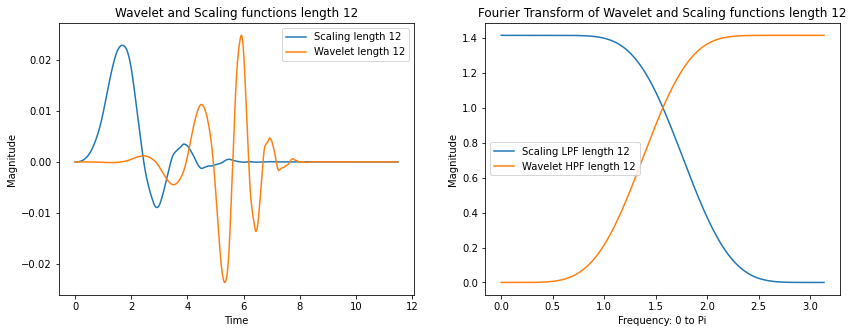

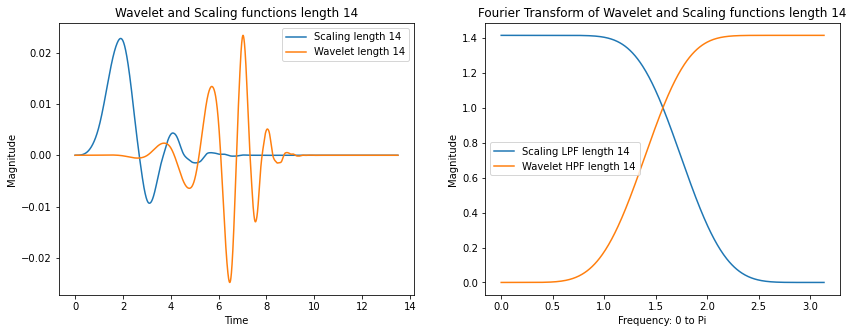

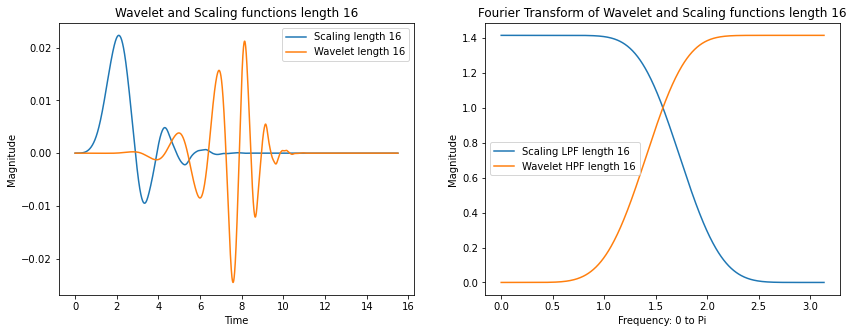

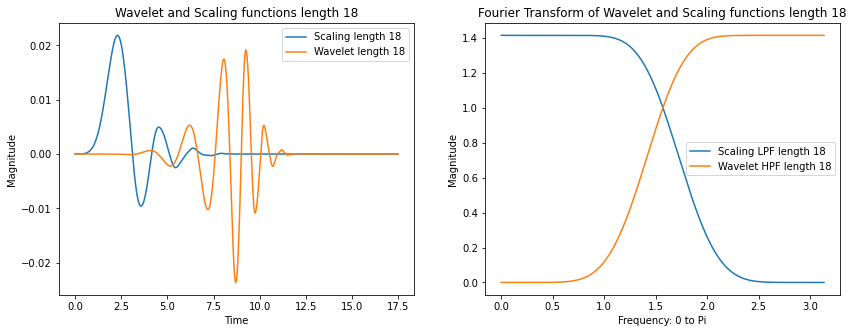

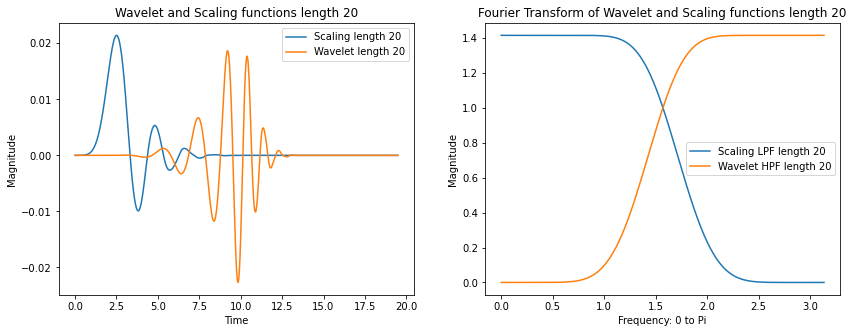

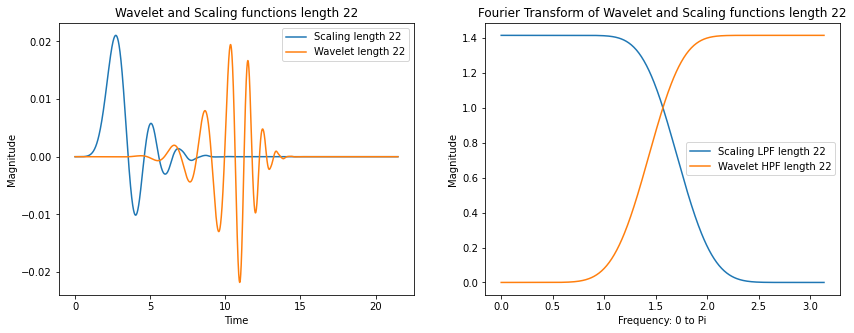

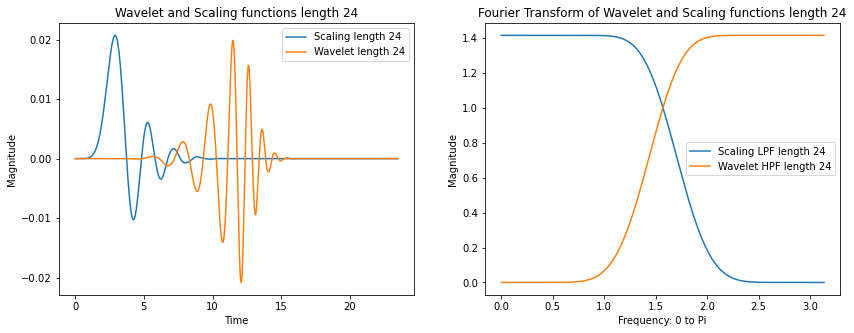

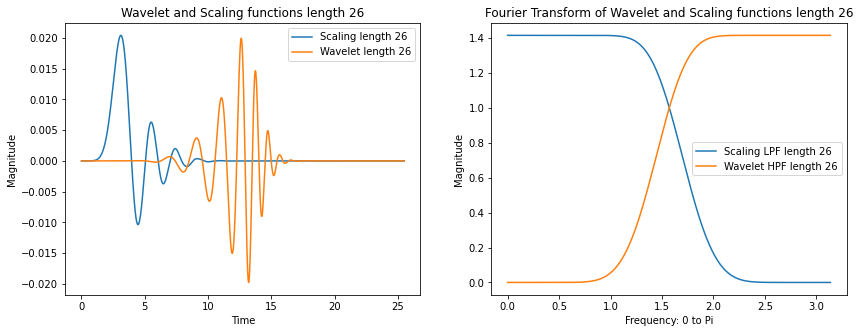

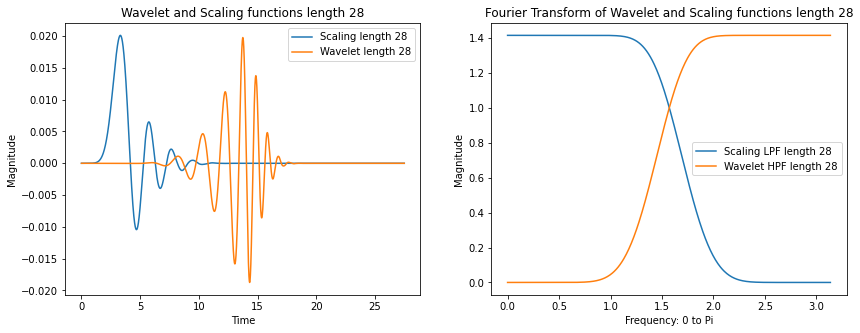

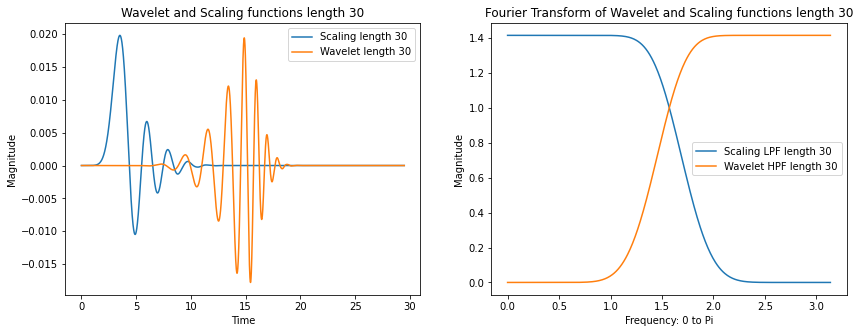

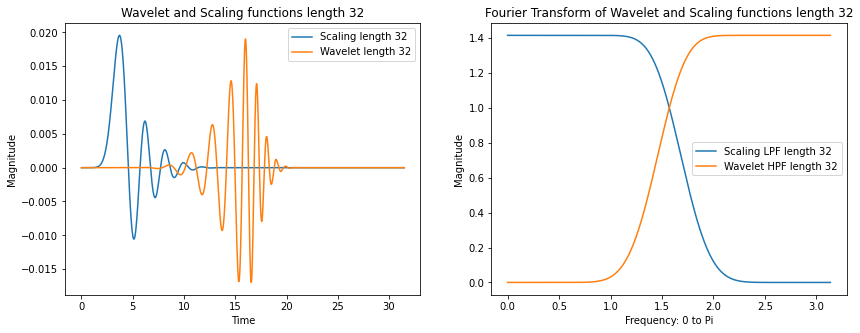

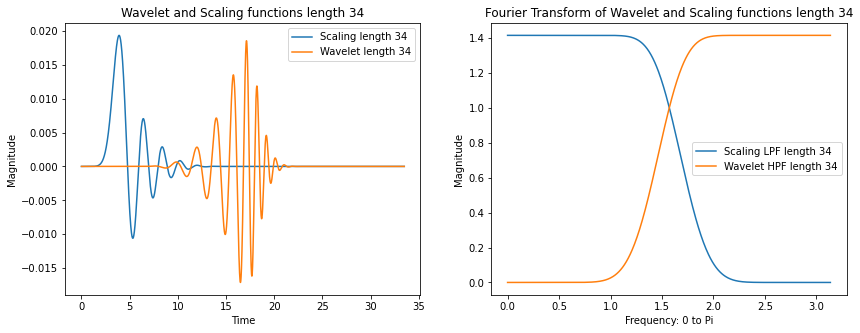

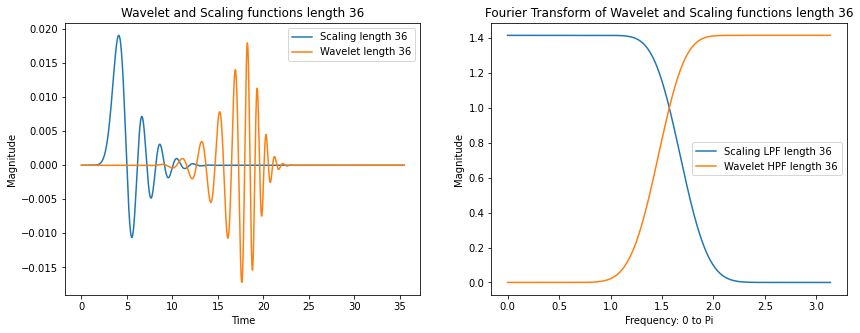

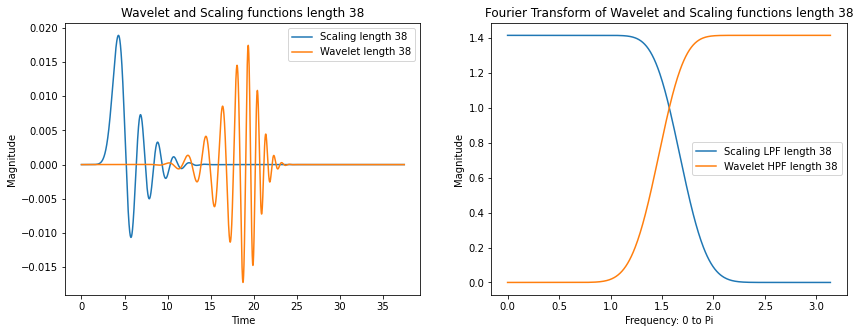

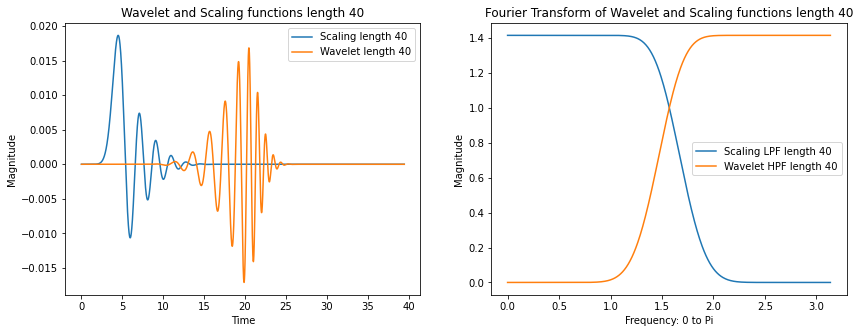

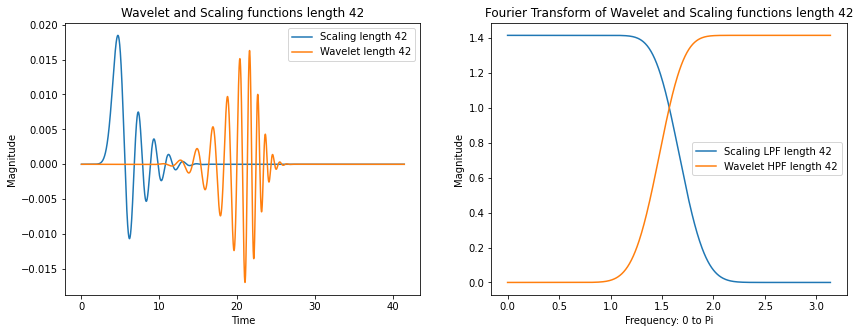

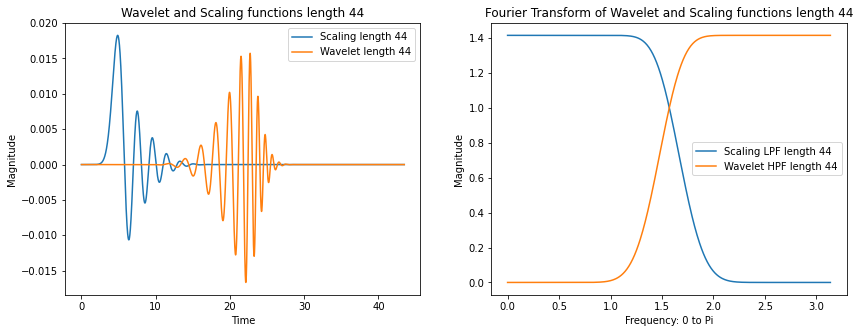

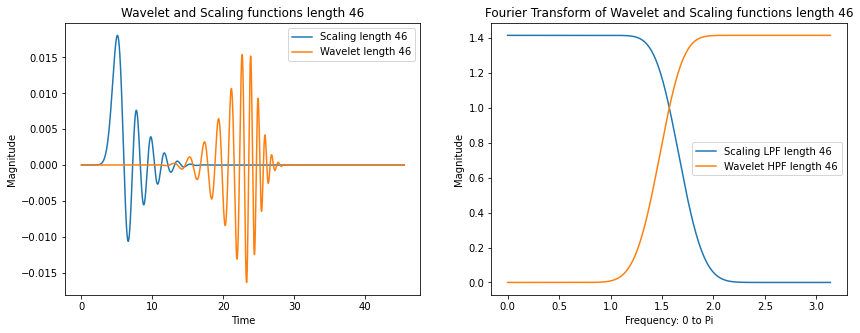

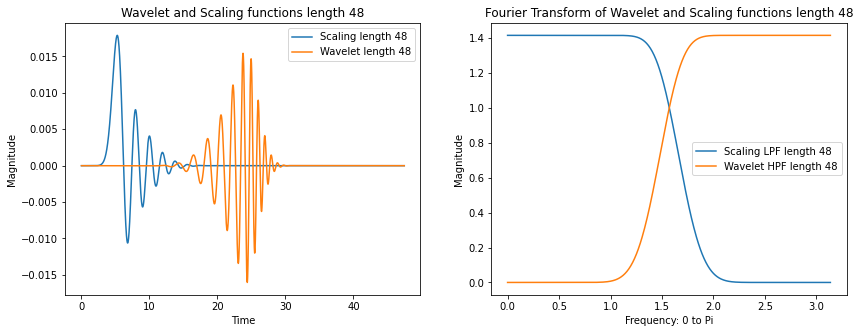

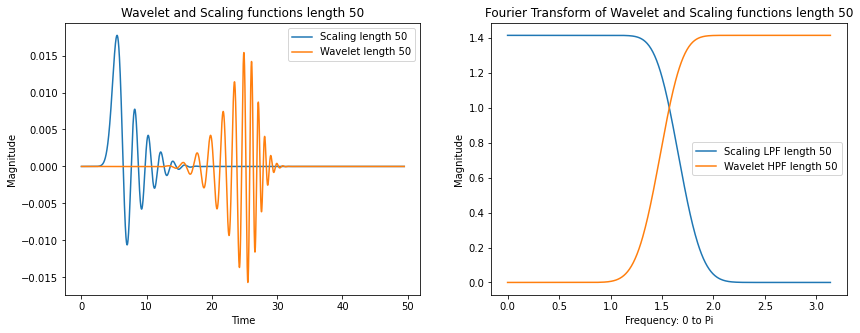

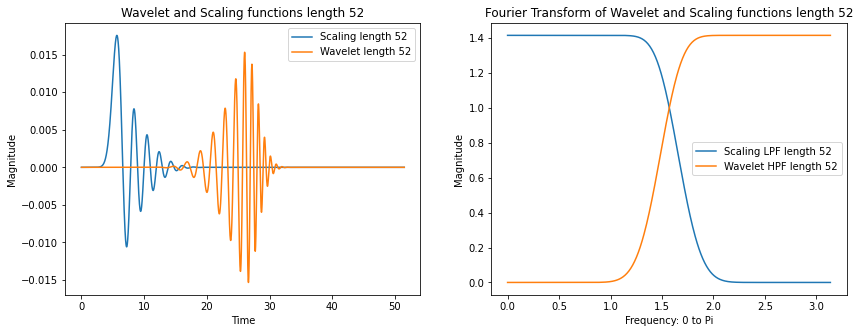

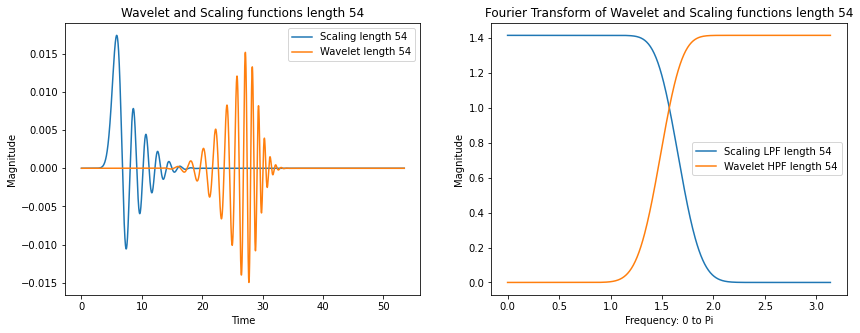

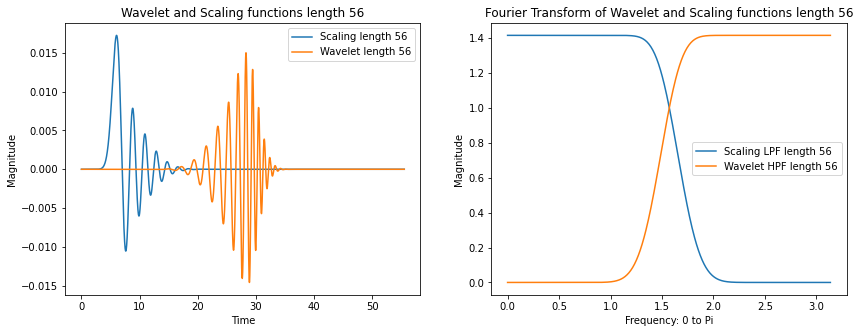

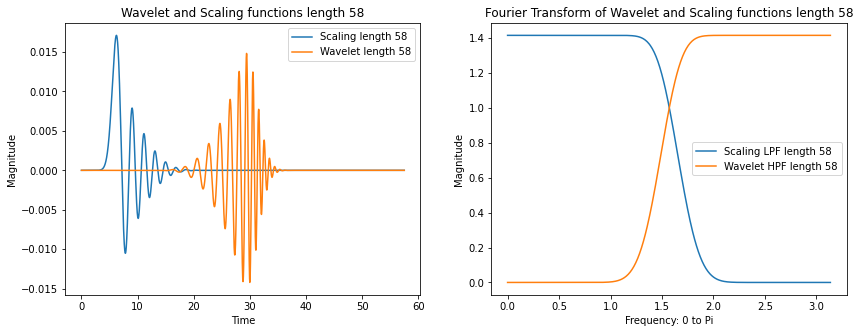

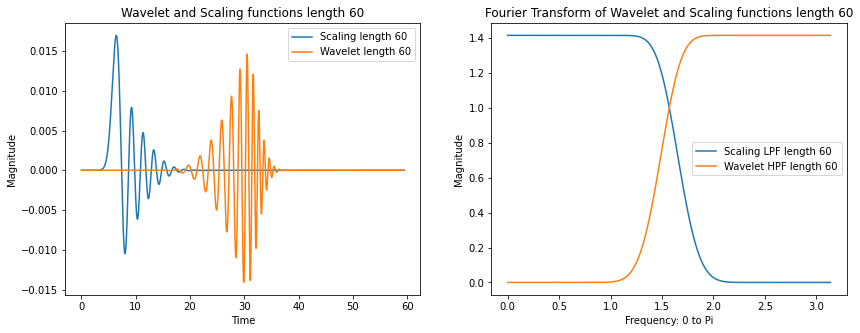

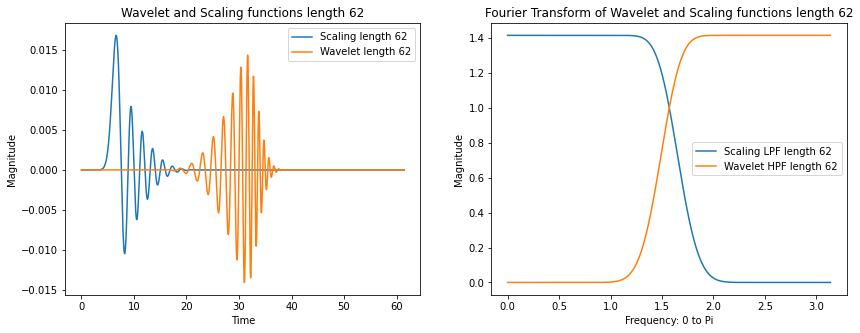

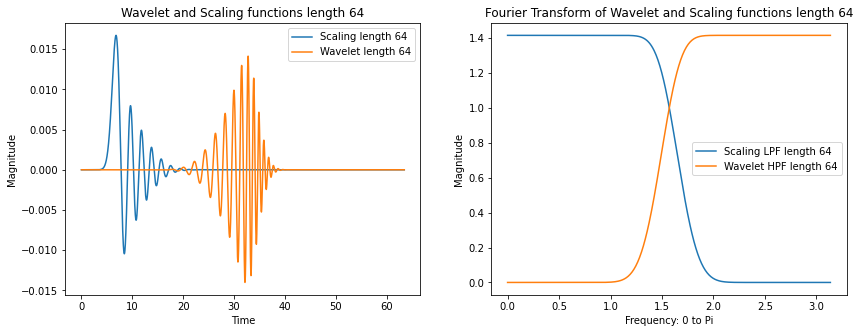

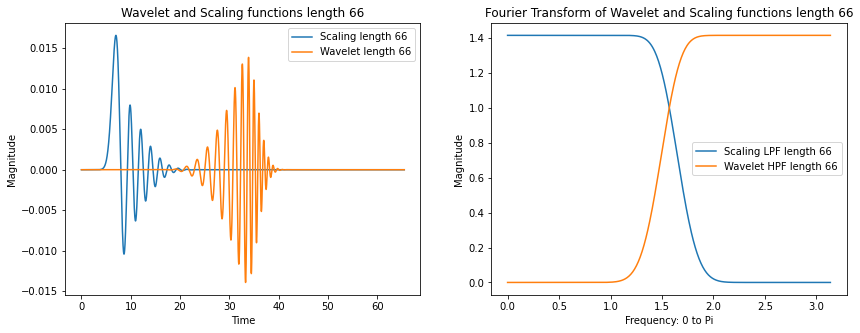

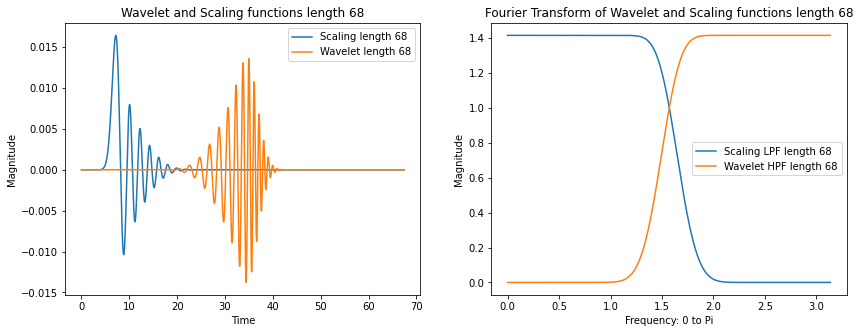

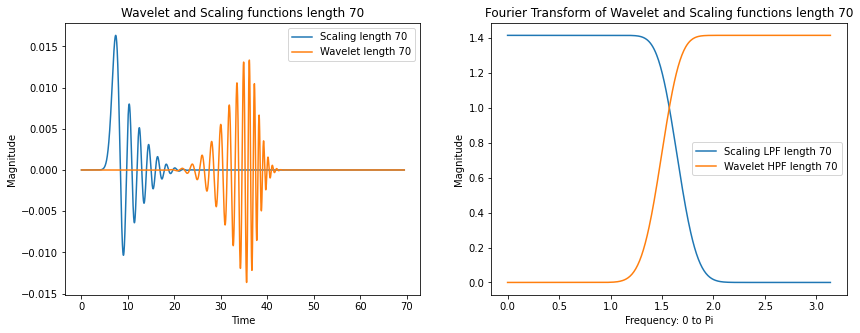

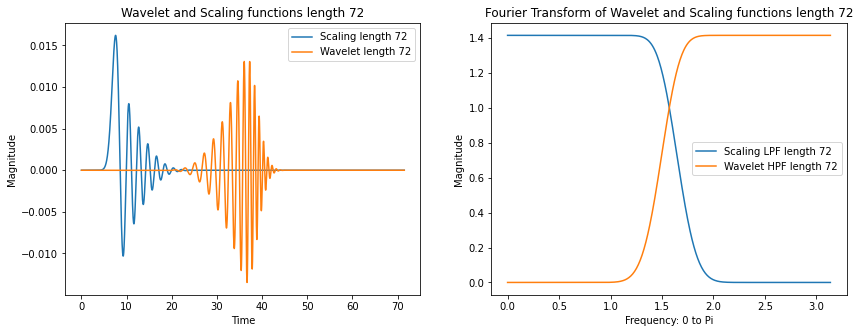

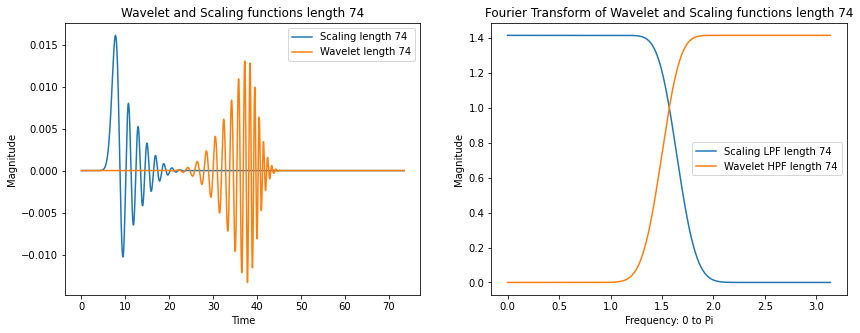

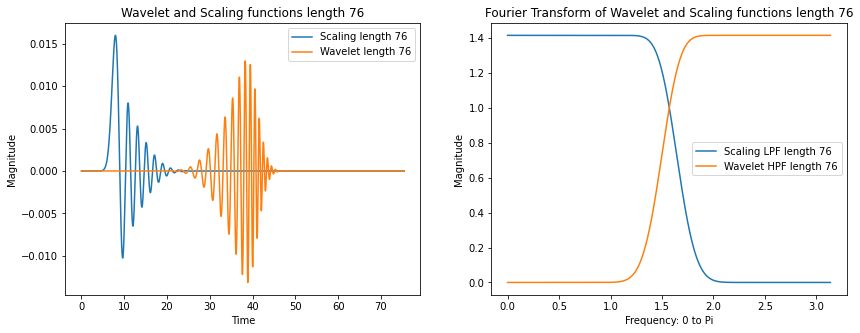

In [341]:
for i in range(1,39):
    scal_wav_filter_ft(2*i)

# Question 2

### Defining functions for norm, time center and nth time moment

In [102]:
def norm(d):
    a=np.multiply(d,d)
    return scipy.integrate.simps(a)

In [103]:
def tim_center(t,d):
    a=np.multiply(t,d)
    a1=np.multiply(a,d)
    return scipy.integrate.simps(a1)/norm(d)

In [104]:
def moment(n,t,d):
    a=np.multiply(d,d)
    x=t-tim_center(t,d)
    k=t-tim_center(t,d)
    for i in range(n-1):
        x=np.multiply(x,k)
    a1=np.multiply(x,a)
    return scipy.integrate.simps(a1)/norm(d)

### Time center for daubeshie length 1 to 38

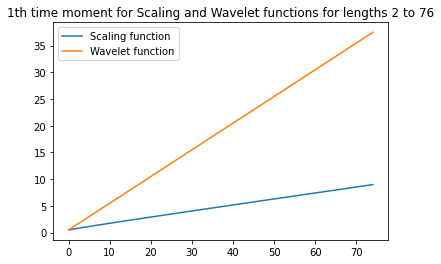

In [266]:
nth_moment_vs_filter_length(1)

### Time variance for daubeshie length 1 to 38

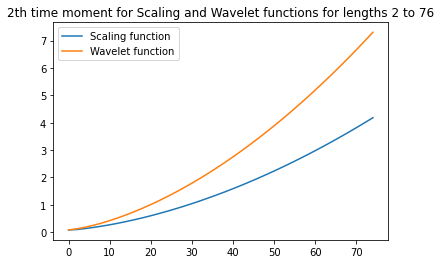

In [267]:
nth_moment_vs_filter_length(2)

### Angular frequency center for daubeshie length 1 to 38 is zero for all the filters

### Angular frequency variance for daubeshie length 1 to 38 

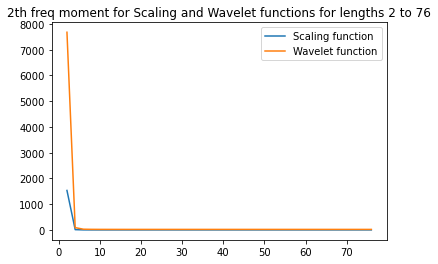

In [322]:
nth_moment_vs_filter_length_f(2)

### Product of $\sigma_t^2$ and $\sigma_{\Omega}^2$ vs Daubeschie filter length

In [317]:
scal2t=[scaling_all_t[i][1] for i in range(38)]
wav2t=[wavelets_all_t[i][1] for i in range(38)]
scal2f=np.zeros(38)
wav2f=np.zeros(38)
for i in range(38):
    _,_,low2,high2=fil_of_size(i+1)
    scal2f[i]=sig_omg_n(low2,2,i+1)
    wav2f[i]=sig_omg_n(high2,2,i+1)

In [320]:
scal_prod=np.multiply(scal2f,scal2t)
wav_prod=np.multiply(wav2f,wav2t)

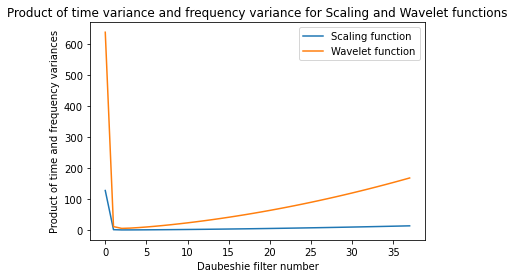

In [342]:
plt.plot(scal_prod,label='Scaling function')
plt.plot(wav_prod,label='Wavelet function')
plt.title("Product of time variance and frequency variance for Scaling and Wavelet functions")
plt.xlabel("Daubeshie filter number")
plt.ylabel("Product of time and frequency variances")
plt.legend()

# Question 3

### Printing first 10 time moments for filter of length n

In [343]:
def time_moments(n):
    t,th,low,high=fil_of_size(int(n/2))
    t1=np.zeros(len(low))
    th1=np.zeros(len(high))
    for i in range(len(t1)):
        t1[i]=t[i]
    for i in range(len(th1)):
        th1[i]=th[i]
    t0_scal=tim_center(t1,low)
    t0_wav=tim_center(th1,high)
    scal=[t0_scal]
    wav=[t0_wav]
    length=10
    for i in range(2,length):
        scal.append(moment(i,t1,low))
        wav.append(moment(i,th1,high))
    print(scal,wav)
    plt.figure()
    plt.plot([i+1 for i in range(length-1)],scal,label='Scaling length '+str(n))
    plt.plot([i+1 for i in range(length-1)],wav,label='Wavelet length '+str(n))
    plt.title("Time moments for Scaling and Wavelet filters of length "+str(n))
    plt.xlabel("n")
    plt.ylabel("nth moment value")
    plt.legend()
    plt.show()

[1.2659174340585666, 0.17291953136146826, 0.0969980620479838, 0.21068953158226977, 0.3096494664180119, 0.6266909393896242, 1.2911327279944402, 3.0032221085377424, 7.4731392253128766] [3.49950908506776, 0.25049079132123553, -0.09053766327890356, 0.28763292951367636, -0.31735829973152535, 0.7434072760324026, -1.3125903642164258, 3.088793152734612, -6.895836827374752]


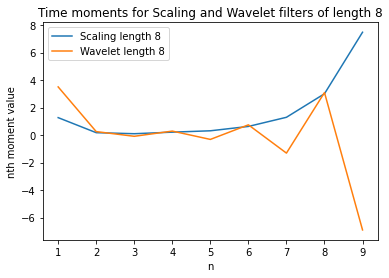

In [344]:
time_moments(8)

### Function to return value of $1^{st}$ to $m^{th}$ moment of nth daubeshie filter

In [138]:
def time_moments_values(nth_daub,mth_moment):
    n=nth_daub
    length=mth_moment
    t,th,low,high=fil_of_size(int(n/2))
    t1=np.zeros(len(low))
    th1=np.zeros(len(high))
    for i in range(len(t1)):
        t1[i]=t[i]
    for i in range(len(th1)):
        th1[i]=th[i]
    t0_scal=tim_center(t1,low)
    t0_wav=tim_center(th1,high)
    scal=[t0_scal]
    wav=[t0_wav]
    for i in range(2,length):
        scal.append(moment(i,t1,low))
        wav.append(moment(i,th1,high))
    return (scal,wav)

In [191]:
#noting all moments for all 38 filters
scaling_all_t=[]
wavelets_all_t=[]
for i in range(38):
    m=2*i+2
    scal1,wav1=time_moments_values(m,30)
    scaling_all_t.append(scal1)
    wavelets_all_t.append(wav1)

### Variation of nth moment wrt filter length

In [345]:
def nth_moment_vs_filter_length(n):
    moments_scal=[scaling_all_t[i][n-1] for i in range(38)]
    moments_wav=[wavelets_all_t[i][n-1] for i in range(38)]
    plt.figure()
    plt.plot([2*i for i in range(38)],moments_scal,label="Scaling function")
    plt.plot([2*i for i in range(38)],moments_wav,label="Wavelet function")
    plt.title(str(n)+"th time moment for Scaling and Wavelet functions for lengths 2 to 76")
    plt.xlabel("Daubeshie filter length")
    plt.ylabel("Value of "+ str(n) + "th time moment",)
    plt.legend()
    plt.show()

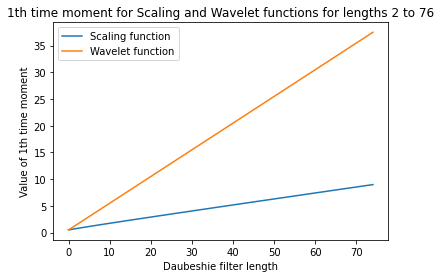

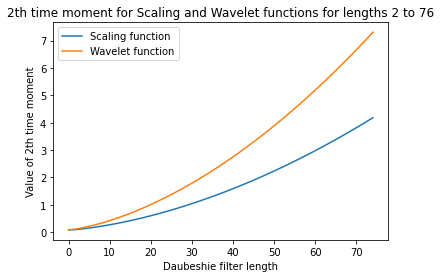

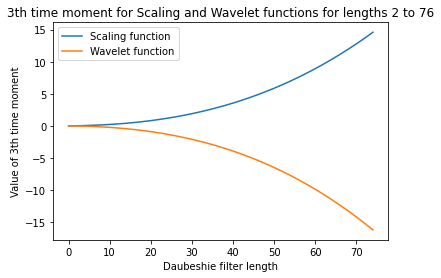

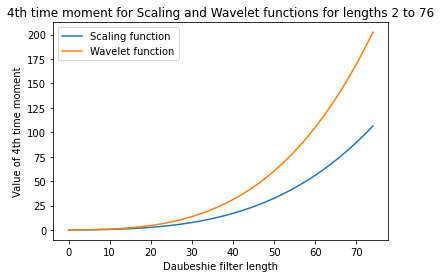

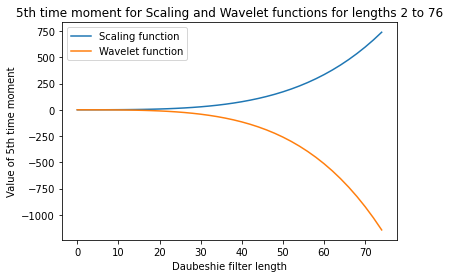

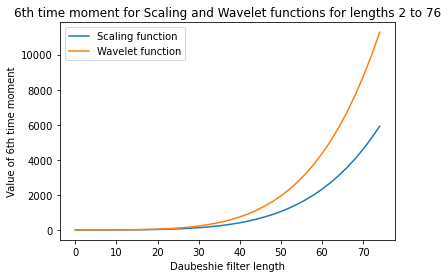

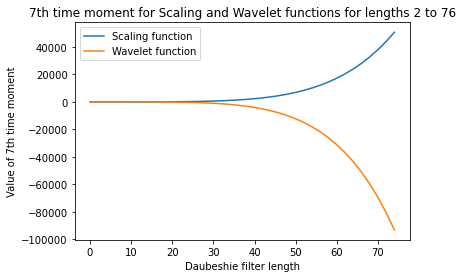

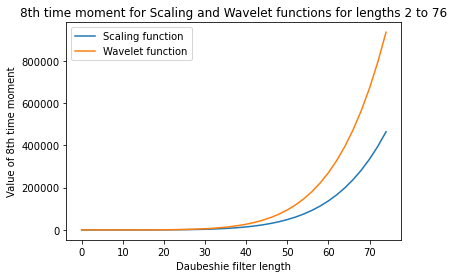

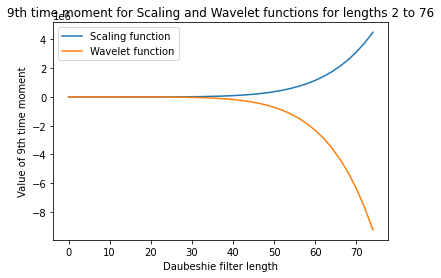

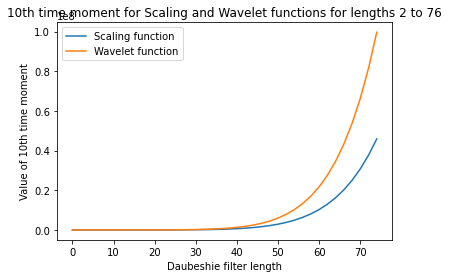

In [346]:
for i in range(10):
    nth_moment_vs_filter_length(i+1)

### Filter length fixed, nth time moment vs n

In [347]:
def nth_moment_vs_n(l):
    moments_scal=[scaling_all_t[l][i] for i in range(29)]
    moments_wav=[wavelets_all_t[l][i] for i in range(29)]
    plt.figure()
    plt.plot([i for i in range(29)],moments_scal,label="Scaling function length "+str(2*l+2))
    plt.plot([i for i in range(29)],moments_wav,label="Wavelet function length"+str(2*l+2))
    plt.title("The values of first 30 time moments for daubeshie filter length "+str(2*l+2))
    plt.xlabel("n")
    plt.ylabel("nth moment value")
    plt.legend()
    plt.show()

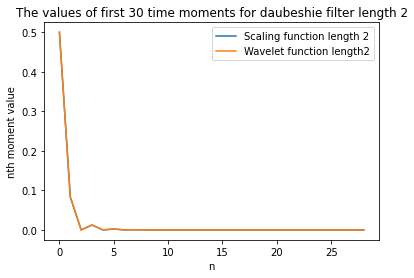

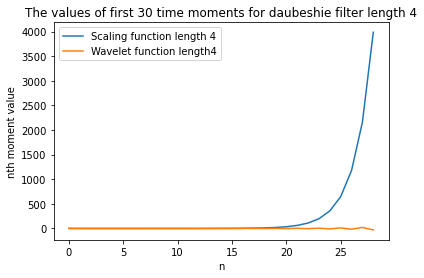

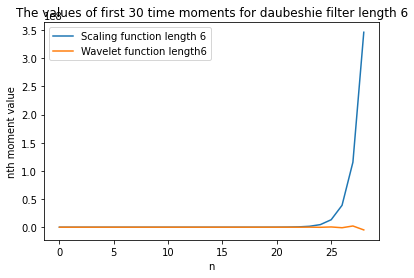

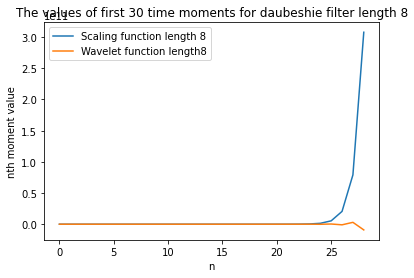

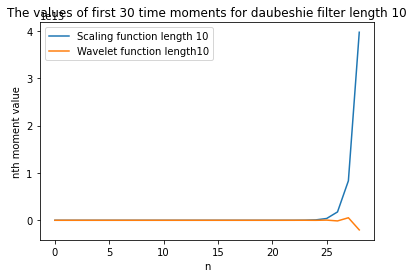

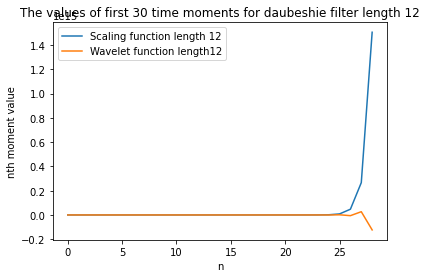

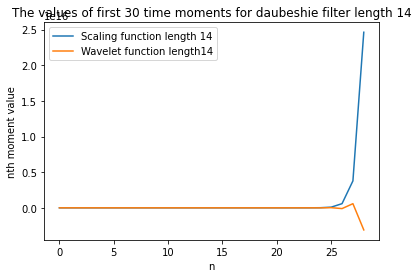

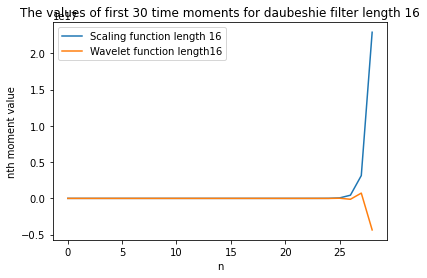

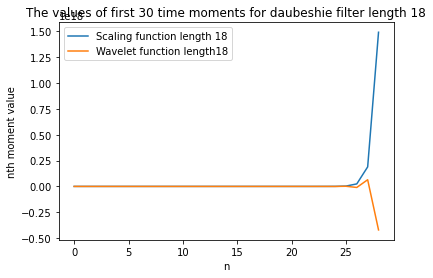

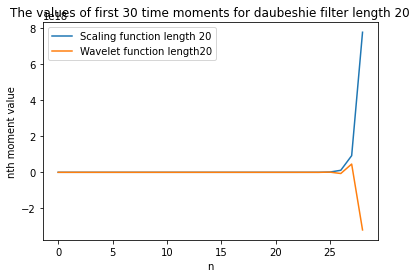

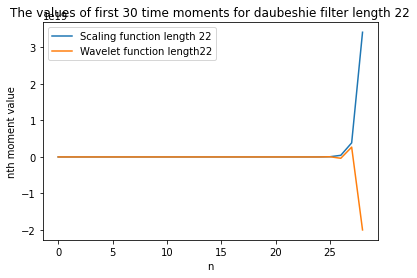

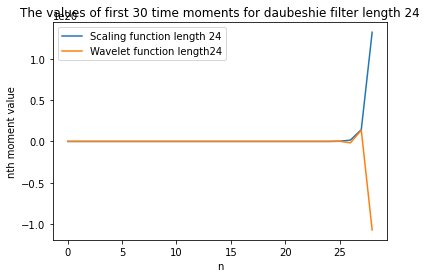

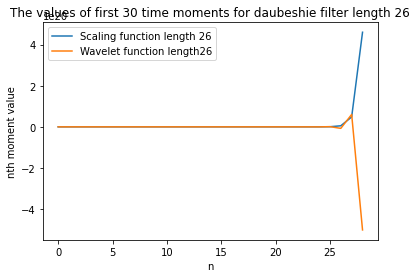

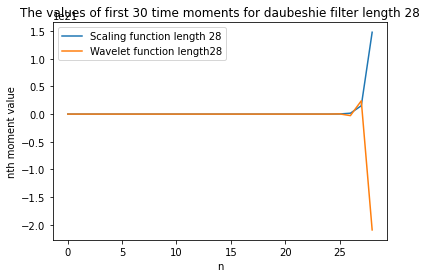

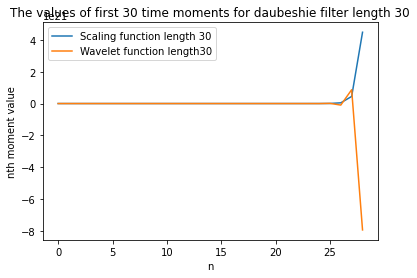

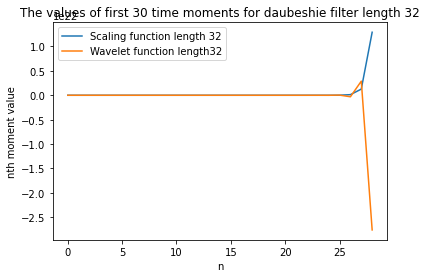

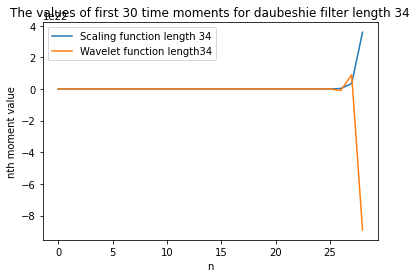

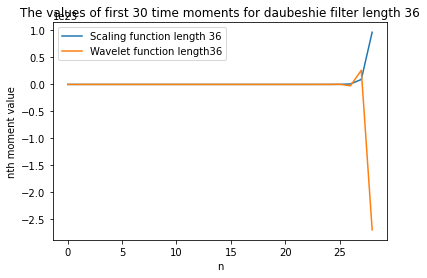

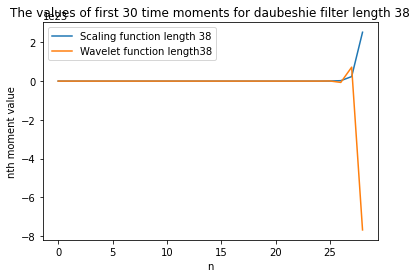

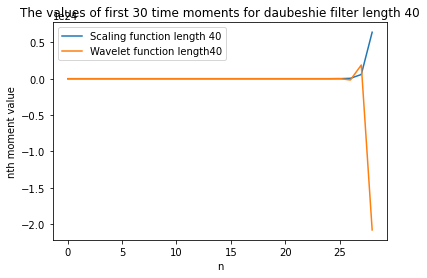

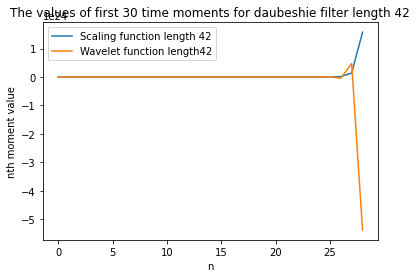

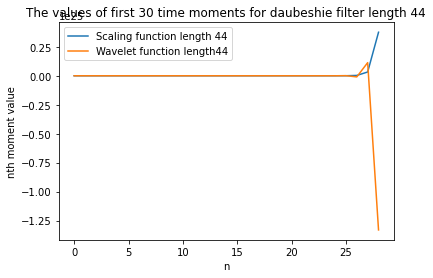

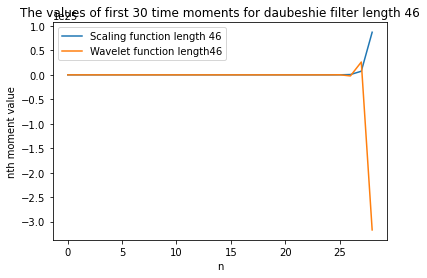

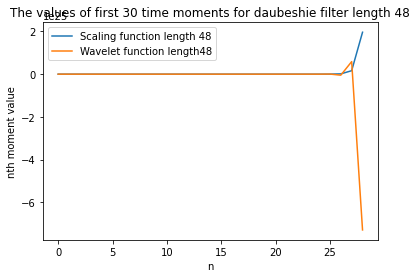

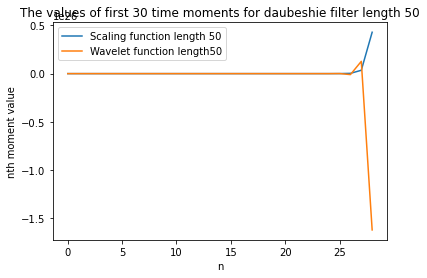

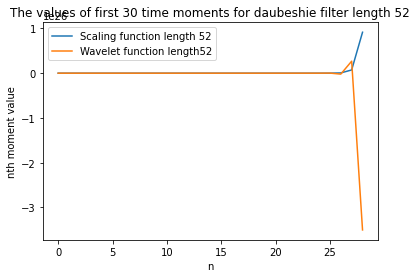

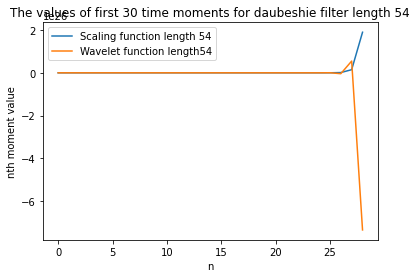

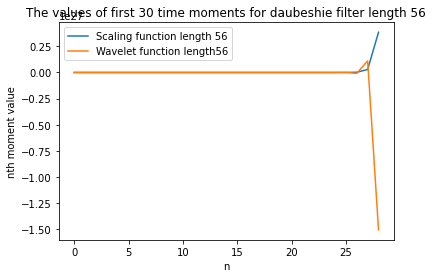

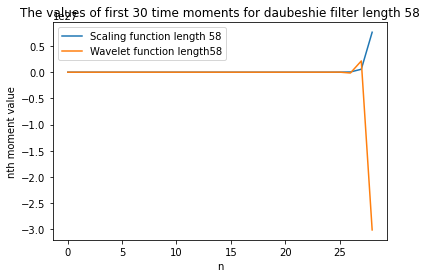

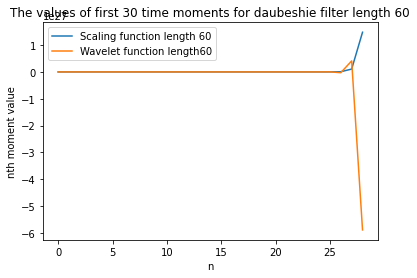

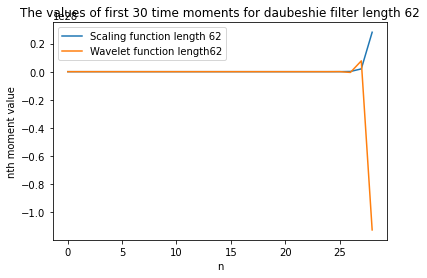

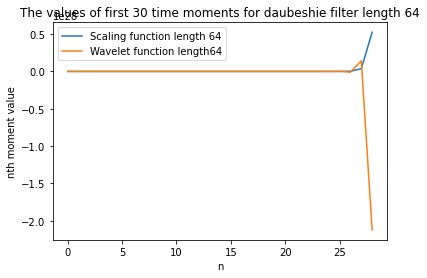

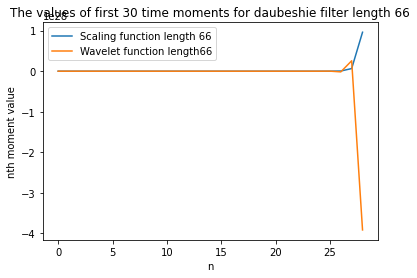

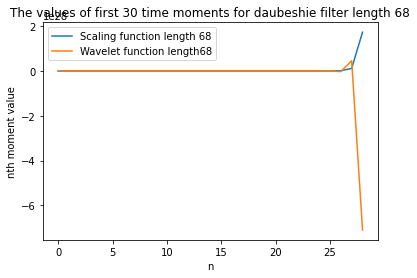

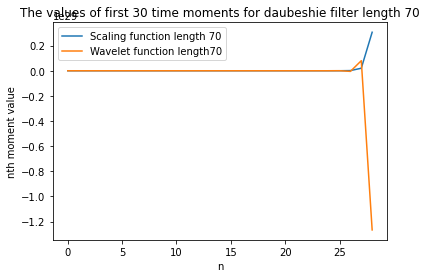

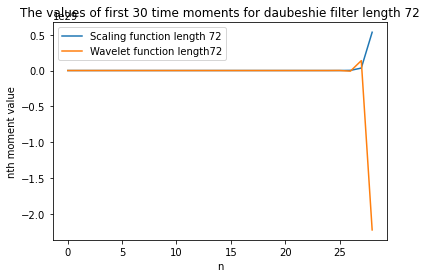

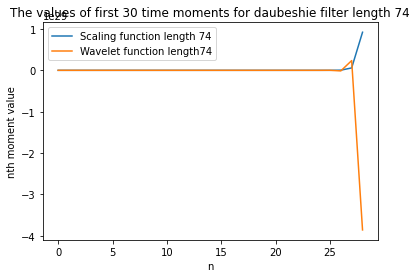

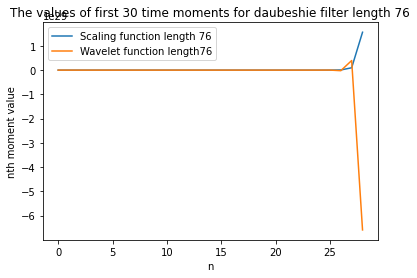

In [348]:
for i in range(38):
    nth_moment_vs_n(i)

### Function defining derivative


In [188]:
def n_diff2(x,n,u):
    if n==0:
        return np.multiply(x,x)
    k= int(n-n%1)
    if n%1 !=0:
        return 0
    d=np.zeros(len(x))
    for i in range(len(x)-1):
        d[i]=(x[i+1]-x[i])*len(x)/(2*u)
    for i in range(k-1):
        for j in range(len(d)-1):
            d[j]=(d[j+1]-d[j])*len(d)/(2*u)
    return np.multiply(d,d)

In [189]:
def sig_omg_n(x,n,k):
    a=n_diff2(x,n/2,k)
    if np.sum(a)==0:
        return 0
    return scipy.integrate.simps(a)/norm(x)

### Returns nth Daubeschies' frequency moment 1 to m

In [307]:
def freq_moments_values(nth_daub,mth_moment):
    n=nth_daub
    length=mth_moment
    t,th,low,high=fil_of_size(int(n/2))
    t1=np.zeros(len(low))
    th1=np.zeros(len(high))
    for i in range(len(t1)):
        t1[i]=t[i]
    for i in range(len(th1)):
        th1[i]=th[i]
    scal=[0]
    wav=[0]
    for i in range(2,length):
        scal.append(sig_omg_n(low,i,int(n/2)))
        wav.append(sig_omg_n(high,i,int(n/2)))
    return (scal,wav)

In [308]:
scaling_all_f=[]
wavelets_all_f=[]
for i in range(38):
    m=2*i+2
    scal1,wav1=freq_moments_values(m,30)
    scaling_all_f.append(scal1)
    wavelets_all_f.append(wav1)

In [351]:
def nth_moment_vs_filter_length_f(n):
    moments_scal=[scaling_all_f[i][n-1] for i in range(38)]
    moments_wav=[wavelets_all_f[i][n-1] for i in range(38)]
    plt.figure()
    plt.plot([2*i+2 for i in range(38)],moments_scal,label="Scaling function")
    plt.plot([2*i+2 for i in range(38)],moments_wav,label="Wavelet function")
    plt.title(str(n)+"th freq moment for Scaling and Wavelet functions for lengths 2 to 76")
    plt.xlabel("length of Daubeshie filter")
    plt.ylabel(str(n)+"th frequency moment value")
    plt.legend()
    plt.show()

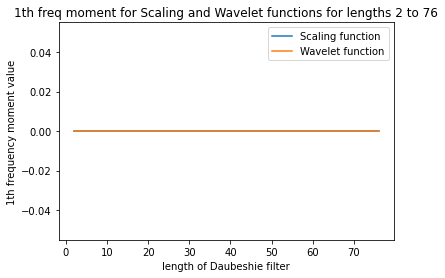

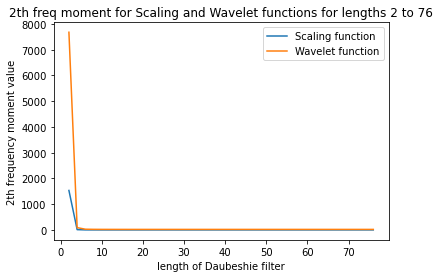

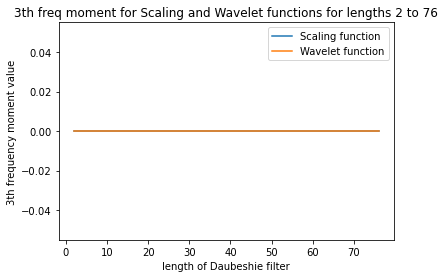

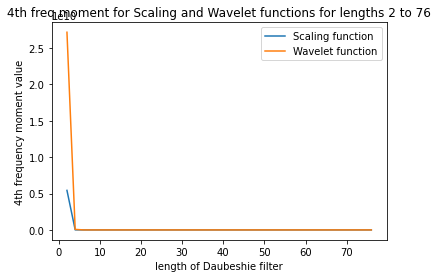

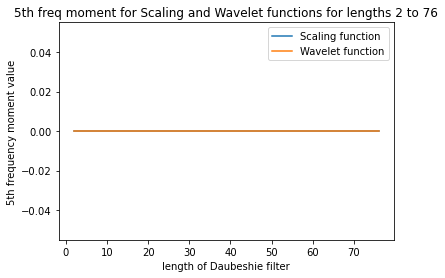

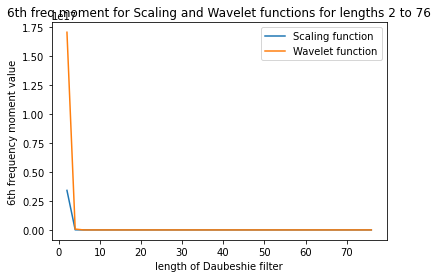

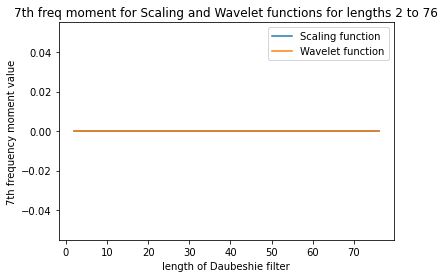

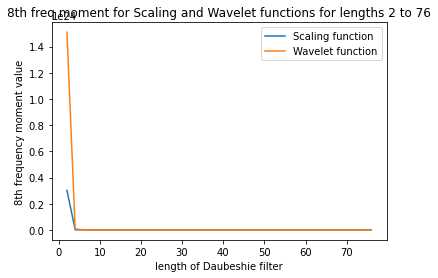

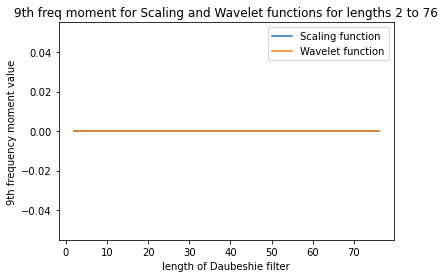

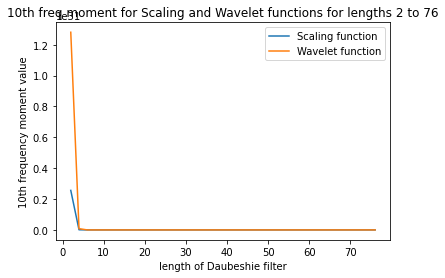

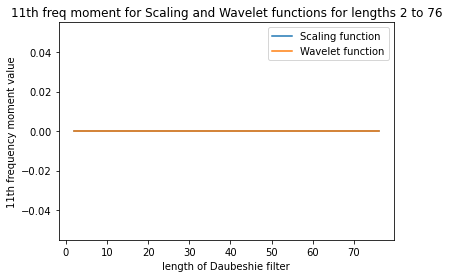

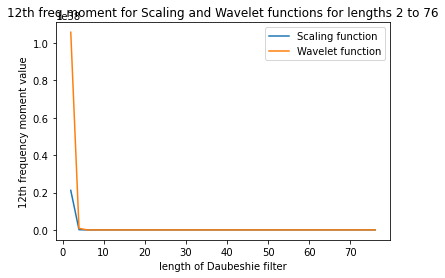

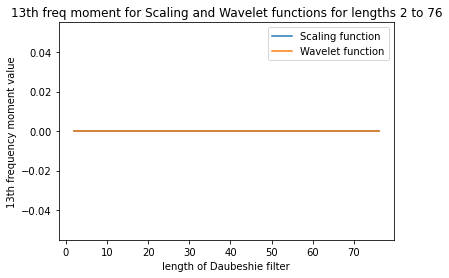

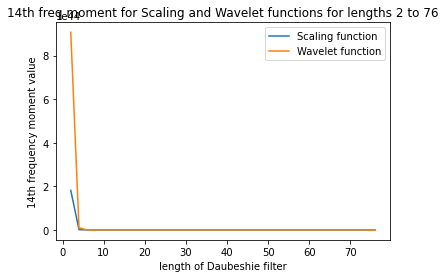

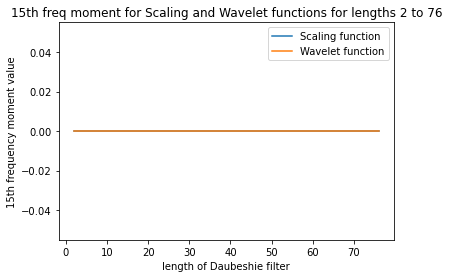

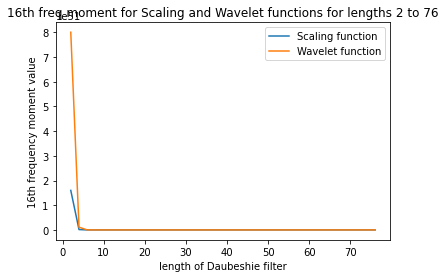

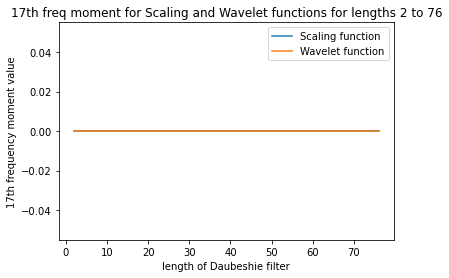

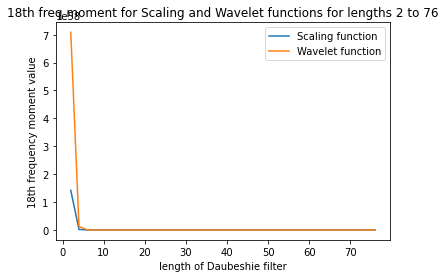

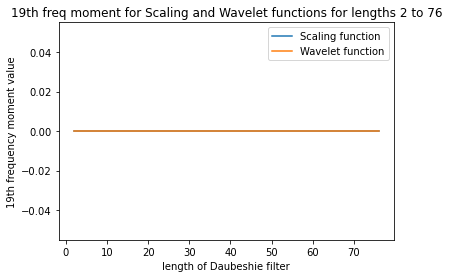

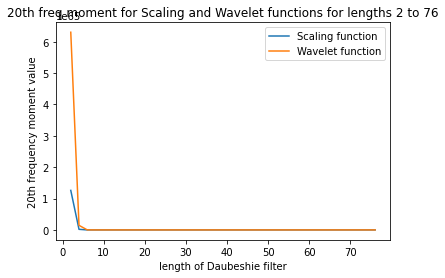

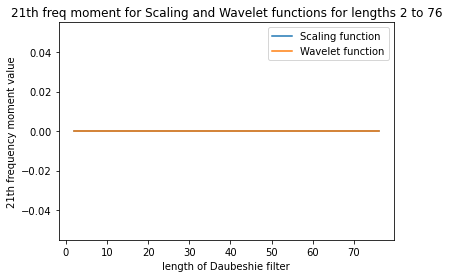

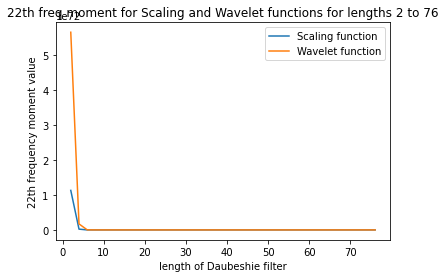

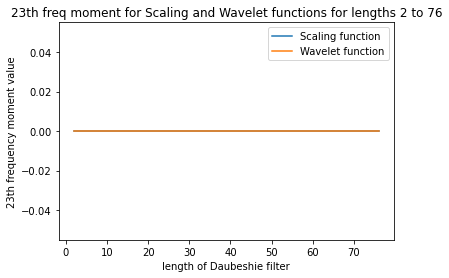

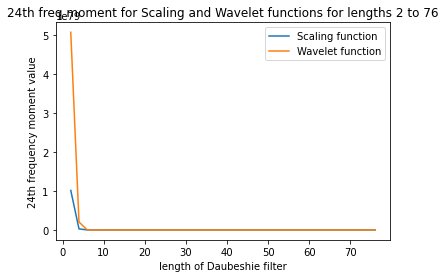

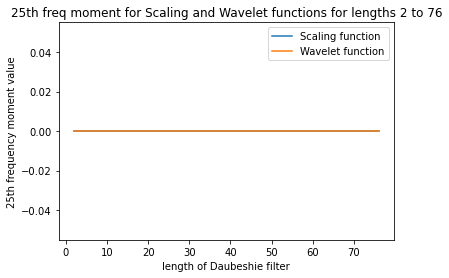

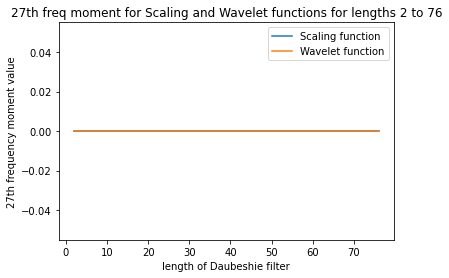

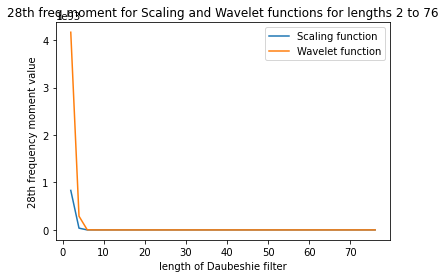

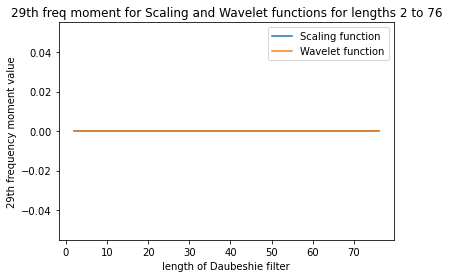

In [352]:
for i in range(29):
    nth_moment_vs_filter_length_f(i+1)

In [367]:
def nth_moment_vs_n_f(l):
    moments_scal=[scaling_all_f[l][i]+0.1 for i in range(29)]
    moments_wav=[wavelets_all_f[l][i]+0.1 for i in range(29)]
    plt.figure()
    plt.plot([2*i for i in range(14)],moments_scal[1::2],label="Scaling function length "+str(2*l+2))
    plt.plot([2*i for i in range(14)],moments_wav[1::2],label="Wavelet function length"+str(2*l+2))
    plt.title("The values of first 30 frequency moments for daubeshie filter length "+str(2*l+2))
    plt.xlabel("n")
    plt.ylabel("nth frequency moment value")
    plt.legend()
    plt.show()

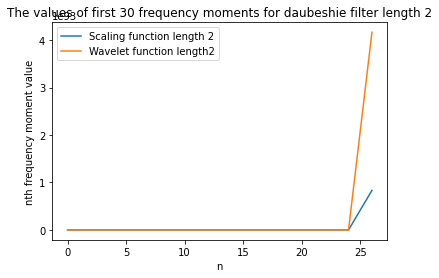

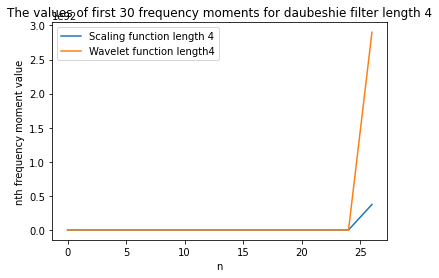

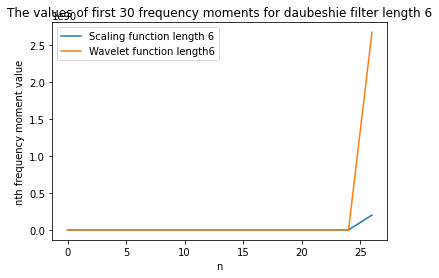

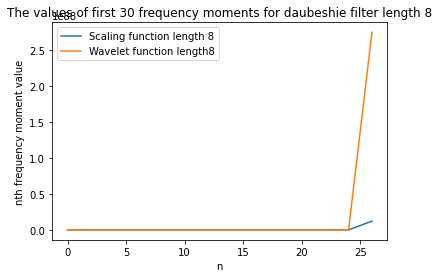

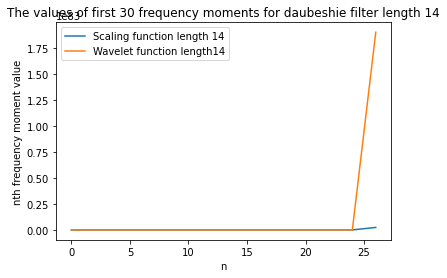

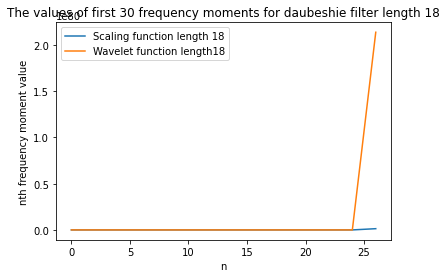

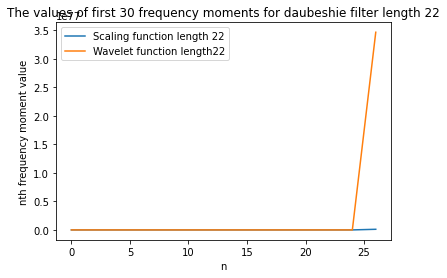

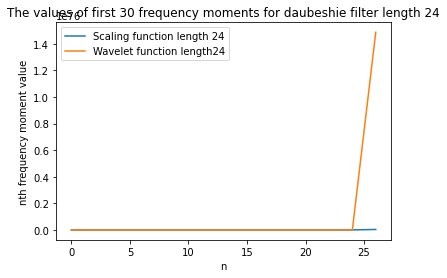

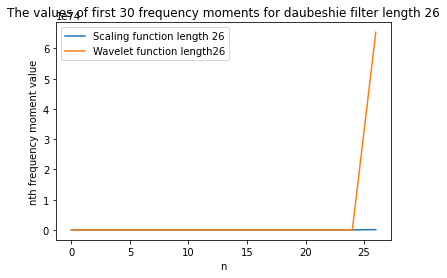

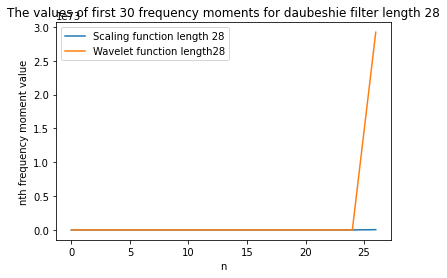

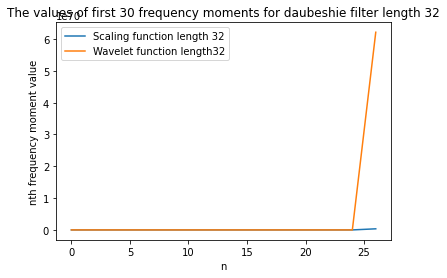

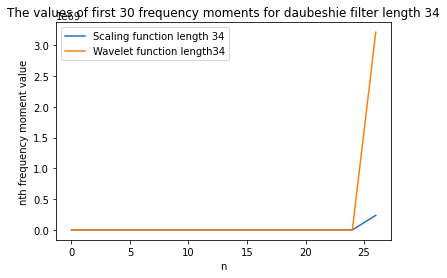

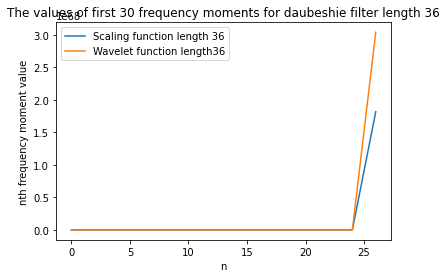

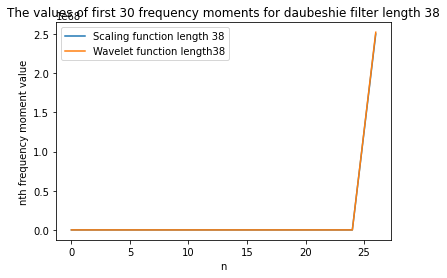

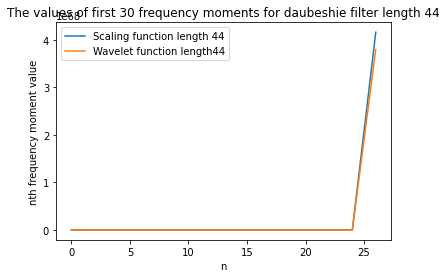

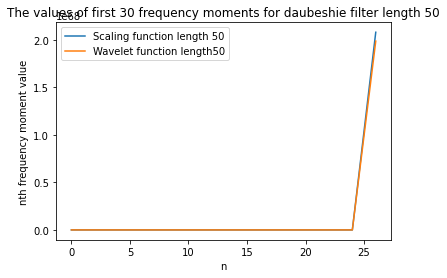

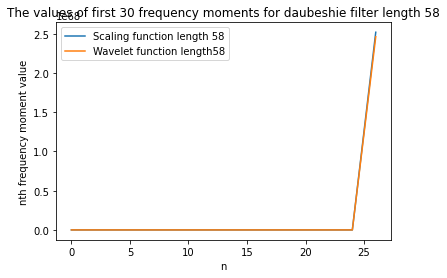

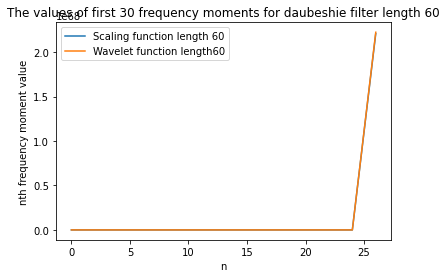

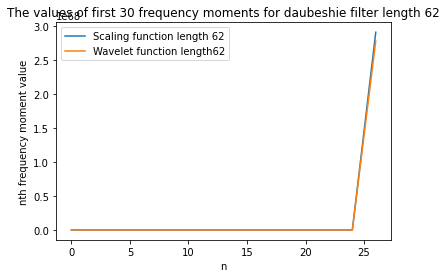

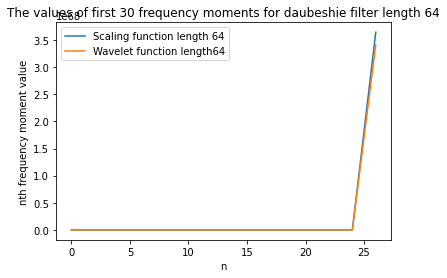

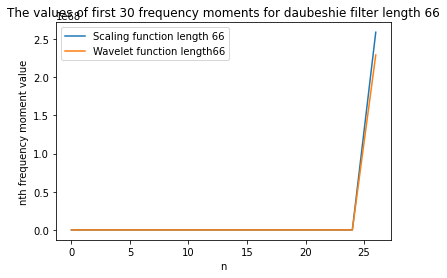

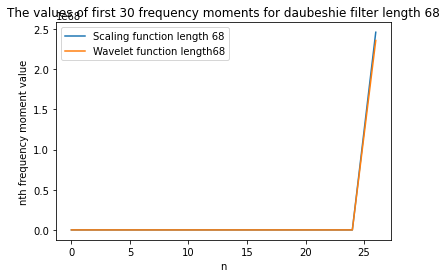

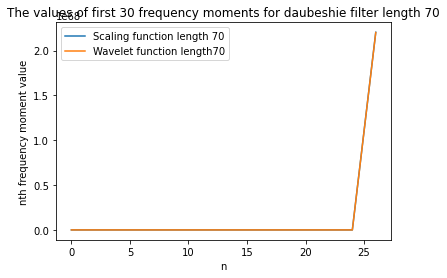

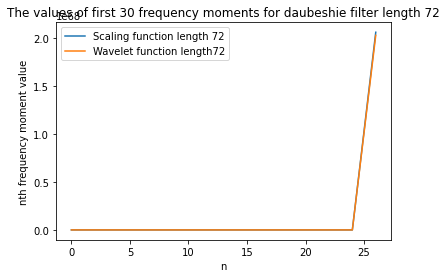

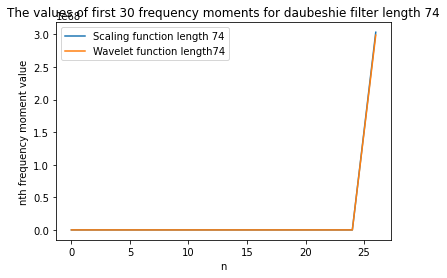

In [368]:
for i in range(38):
    nth_moment_vs_n_f(i)

In [369]:
def nth_moment_vs_n_flog(l):
    moments_scal=[scaling_all_f[l][i]+0.1 for i in range(29)]
    moments_wav=[wavelets_all_f[l][i]+0.1 for i in range(29)]
    plt.figure()
    plt.plot([2*i for i in range(14)],np.log(moments_scal[1::2]),label="Scaling function length "+str(2*l+2))
    plt.plot([2*i for i in range(14)],np.log(moments_wav[1::2]),label="Wavelet function length"+str(2*l+2))
    plt.title("Log of values of first 30 frequency moments for daubeshie filter length "+str(2*l+2))
    plt.xlabel("n")
    plt.ylabel("log(nth moment value)")
    plt.legend()
    plt.show()

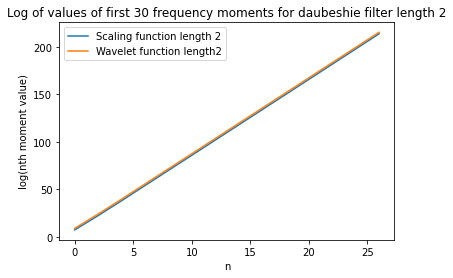

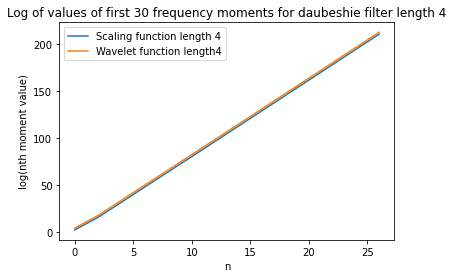

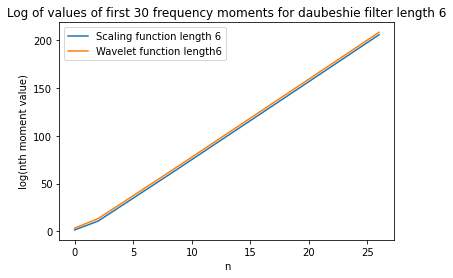

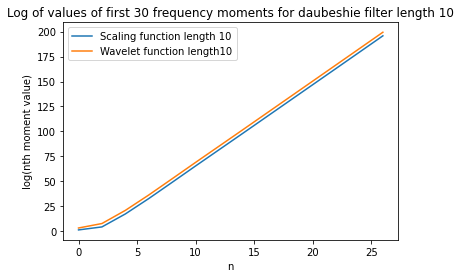

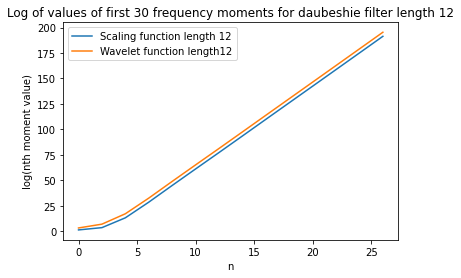

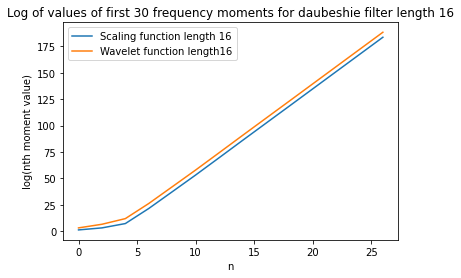

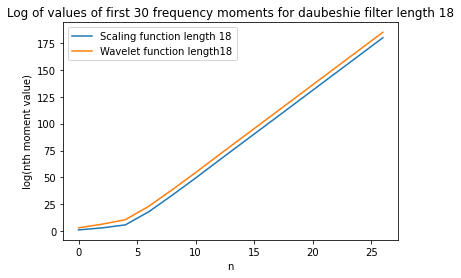

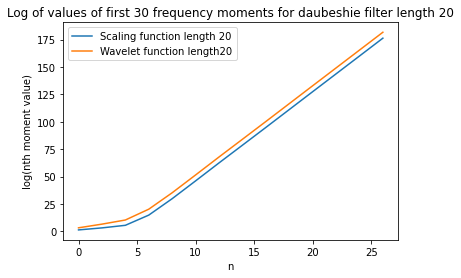

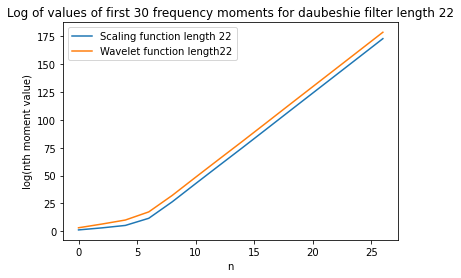

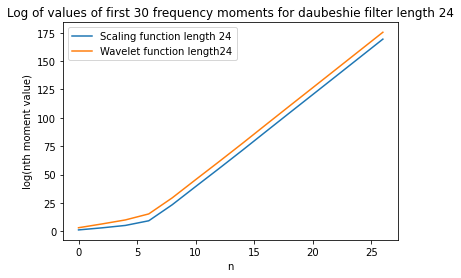

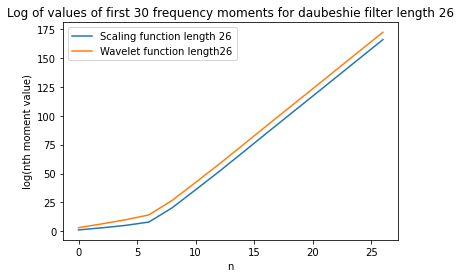

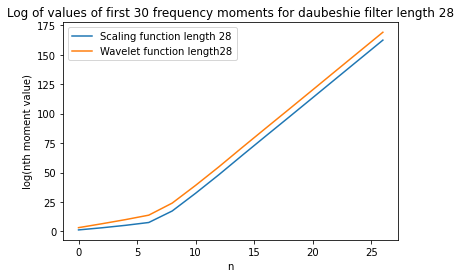

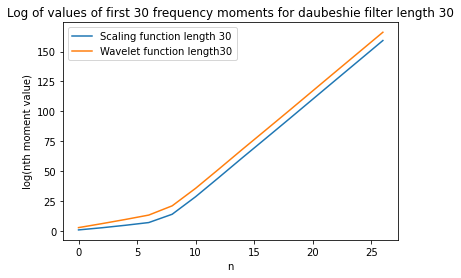

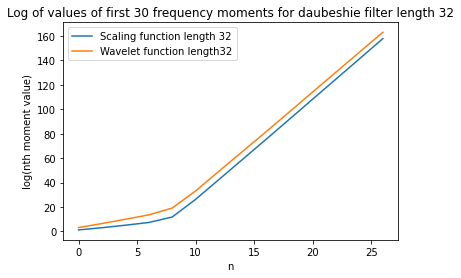

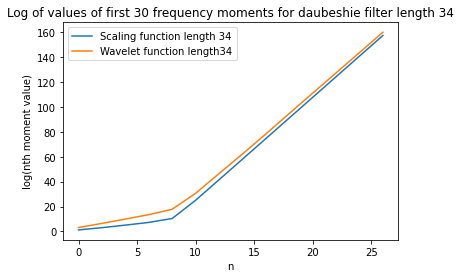

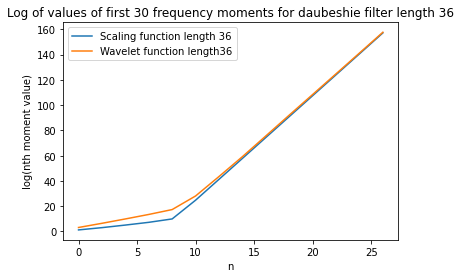

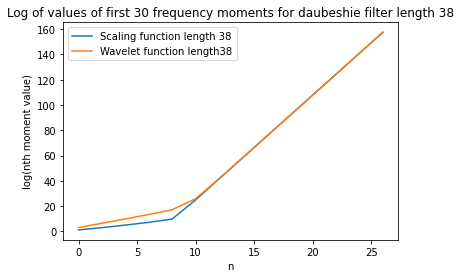

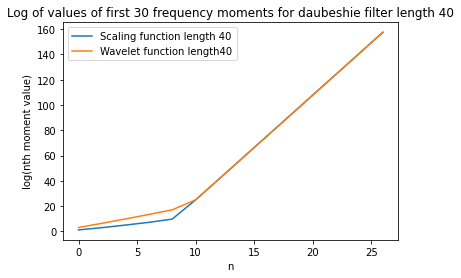

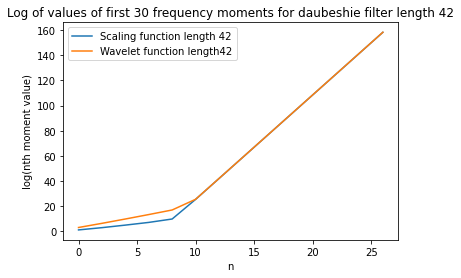

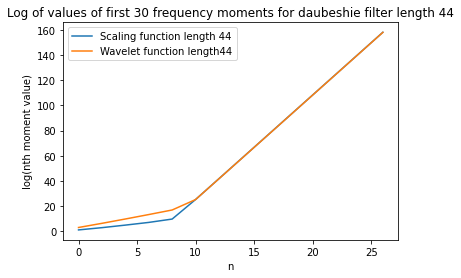

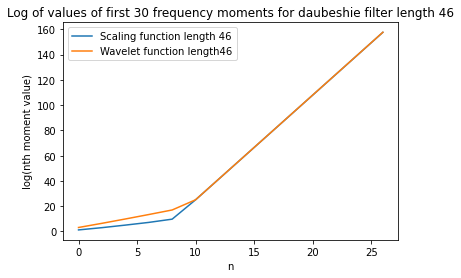

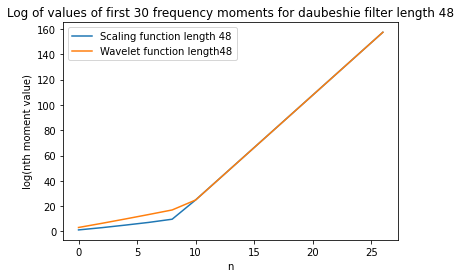

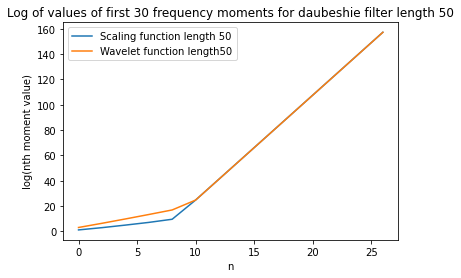

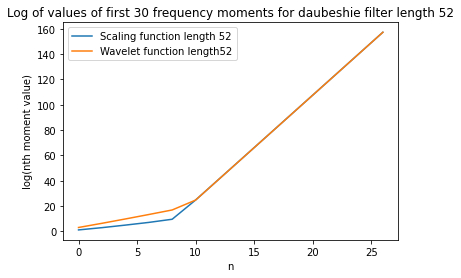

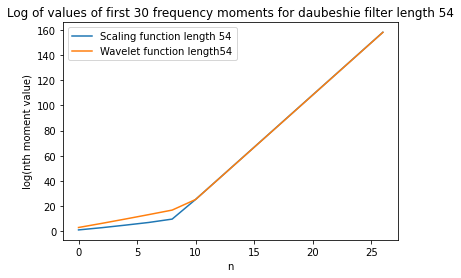

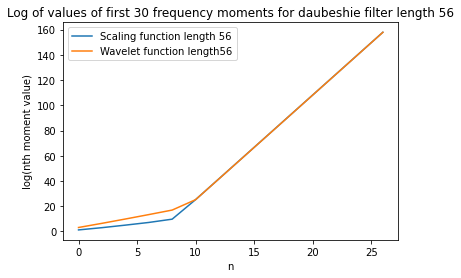

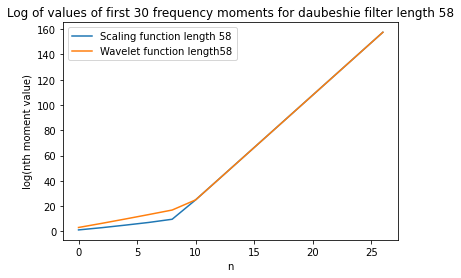

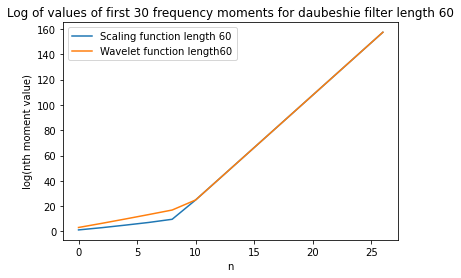

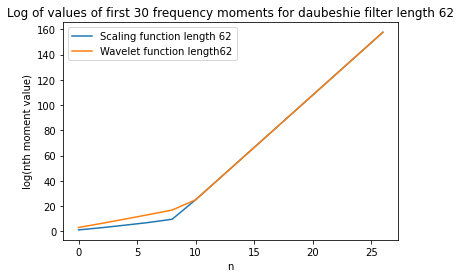

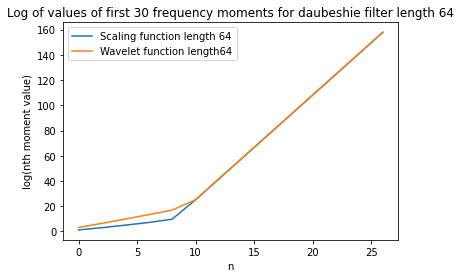

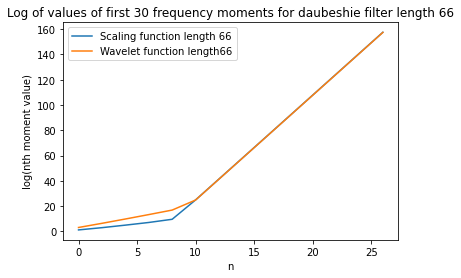

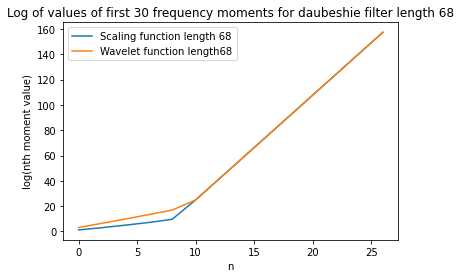

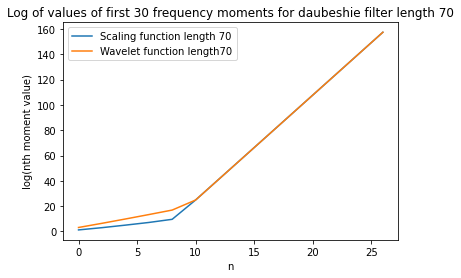

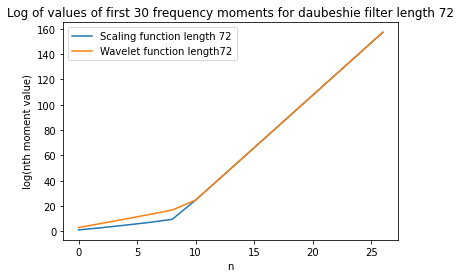

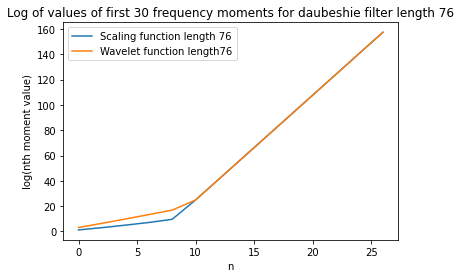

In [370]:
for i in range(38):
    nth_moment_vs_n_flog(i)

In [363]:
scaling_all_prod=np.multiply(scaling_all_t,scaling_all_f)
wavelets_all_prod=np.multiply(wavelets_all_t,wavelets_all_f)

In [364]:
def nth_moment_vs_filter_length_prod(n):
    moments_scal=[scaling_all_prod[i][n-1] for i in range(38)]
    moments_wav=[wavelets_all_prod[i][n-1] for i in range(38)]
    plt.figure()
    plt.plot([2*i+2 for i in range(38)],moments_scal,label="Scaling function")
    plt.plot([2*i+2 for i in range(38)],moments_wav,label="Wavelet function")
    plt.title("Product of "+str(n)+"th freq moment and "+ str(n)+"th time moment for Scaling and Wavelet functions for lengths 2 to 76")
    plt.xlabel("length of Daubeshie filter")
    plt.ylabel(str(n)+"th moment product value")
    plt.legend()
    plt.show()

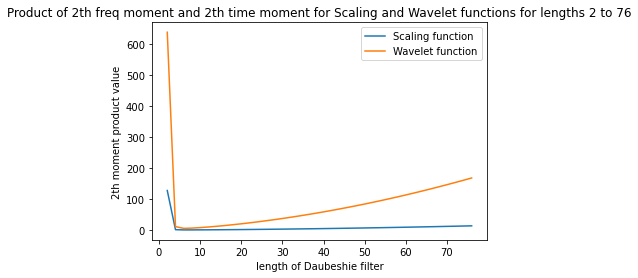

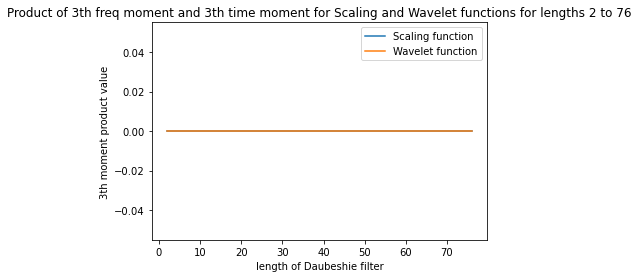

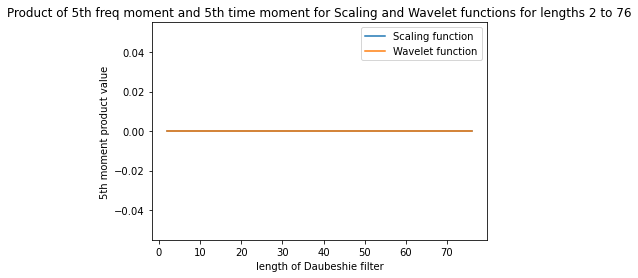

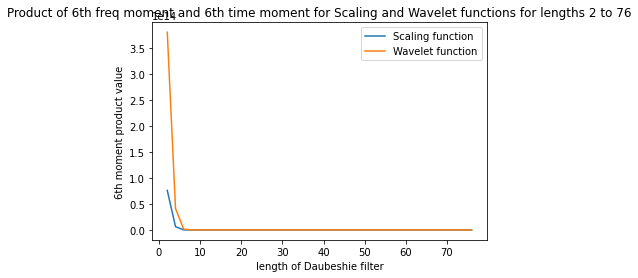

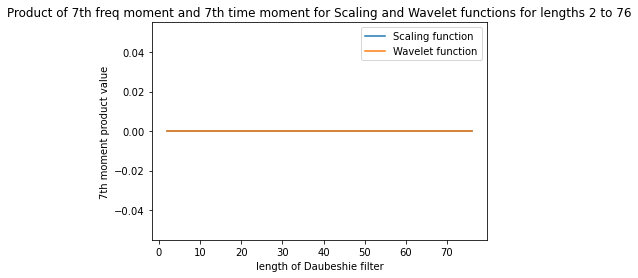

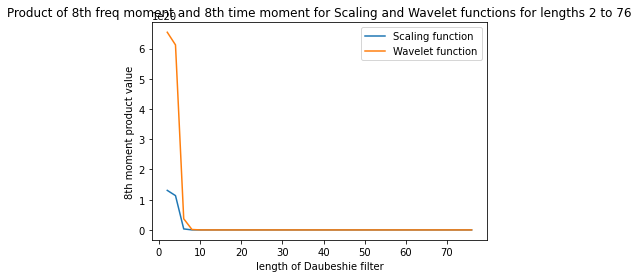

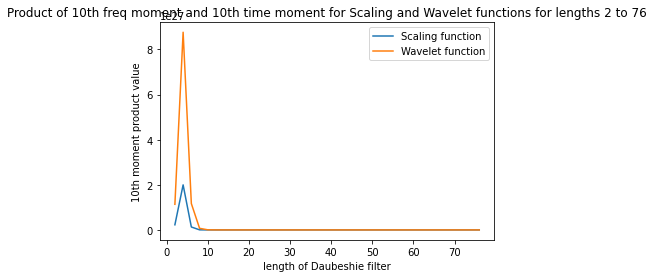

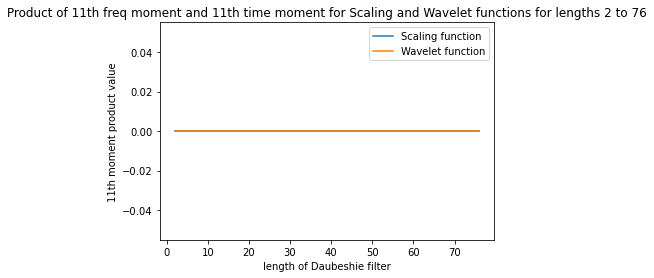

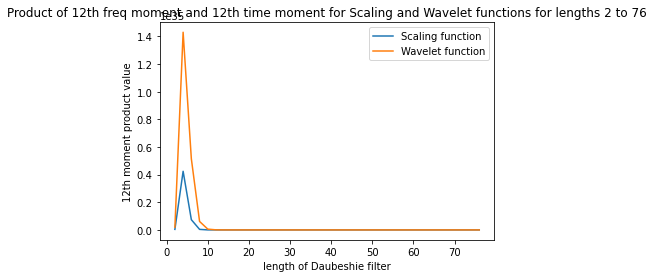

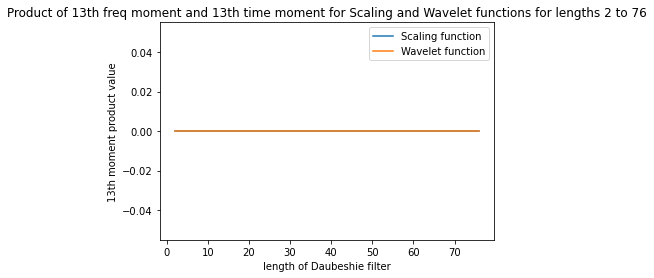

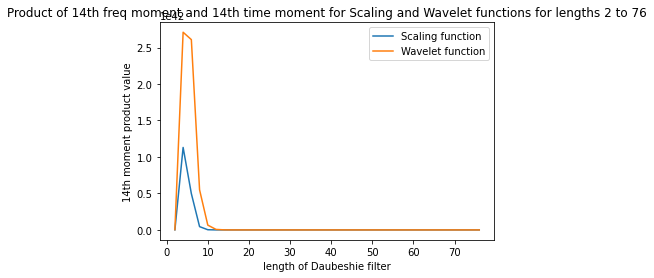

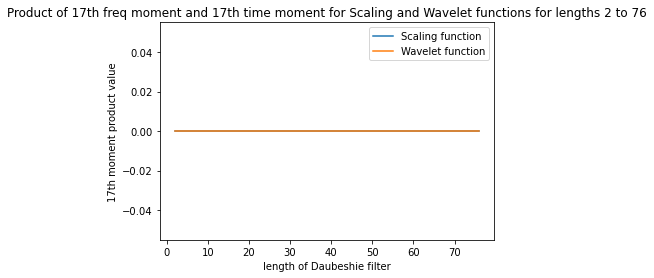

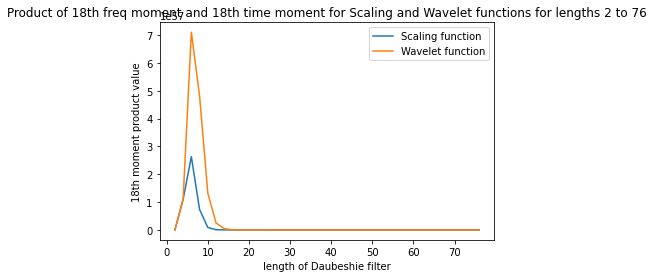

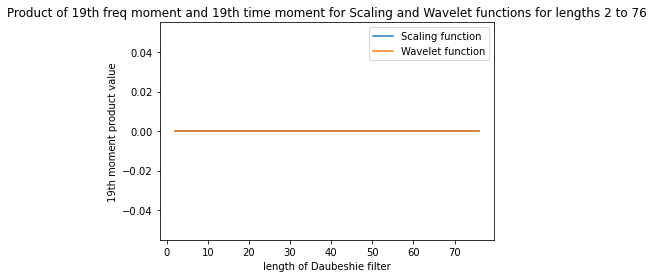

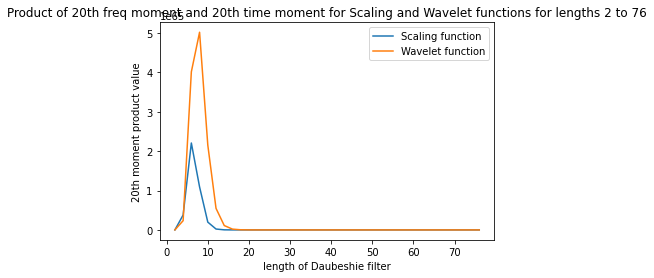

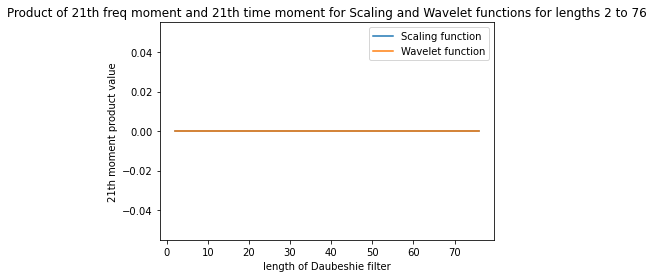

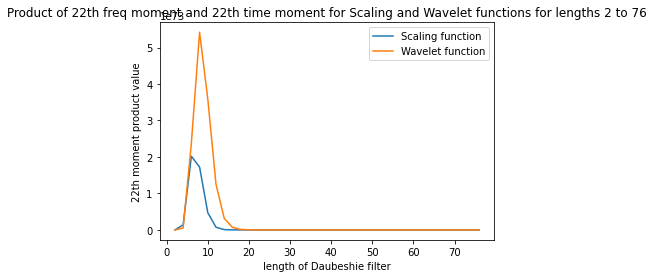

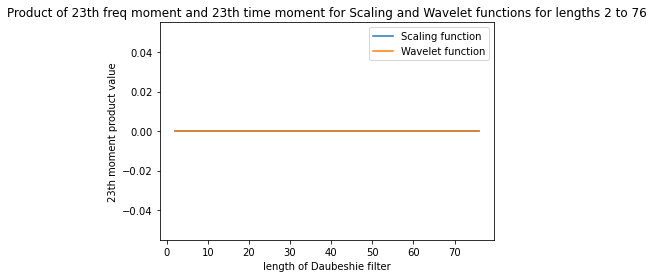

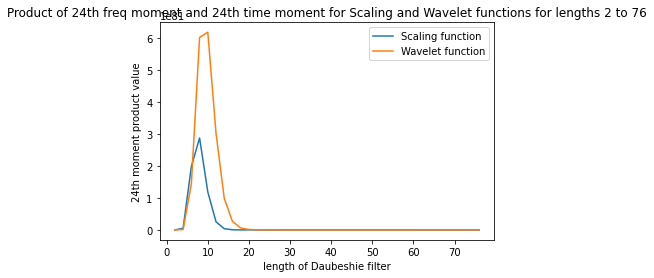

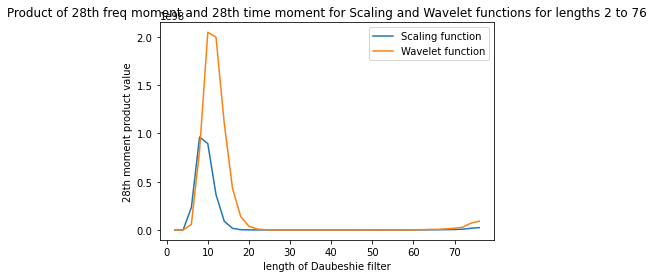

In [366]:
for i in range(29):
    nth_moment_vs_filter_length_prod(i+1)

In [371]:
def nth_moment_vs_n_prod(l):
    moments_scal=[scaling_all_prod[l][i]+0.1 for i in range(29)]
    moments_wav=[wavelets_all_prod[l][i]+0.1 for i in range(29)]
    plt.figure()
    plt.plot([2*i for i in range(14)],moments_scal[1::2],label="Scaling function length "+str(2*l+2))
    plt.plot([2*i for i in range(14)],moments_wav[1::2],label="Wavelet function length"+str(2*l+2))
    plt.title("The values of product of first 30 frequency and time moments for daubeshie filter length "+str(2*l+2))
    plt.xlabel("n")
    plt.ylabel("nth moment product value")
    plt.legend()
    plt.show()

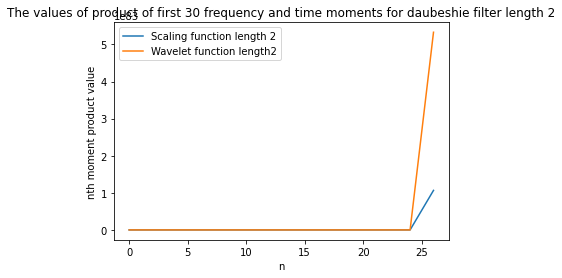

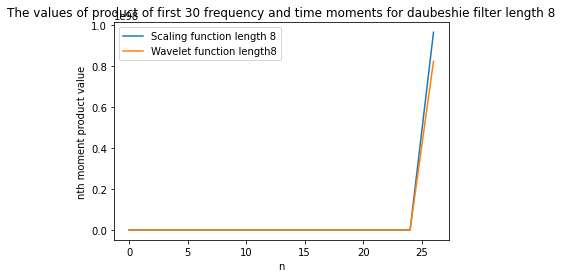

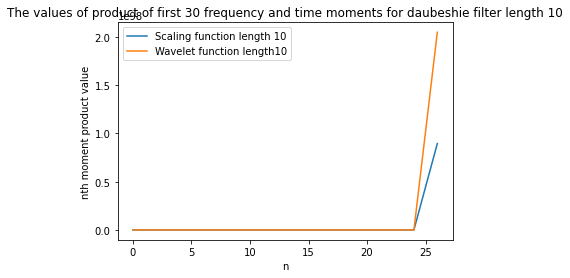

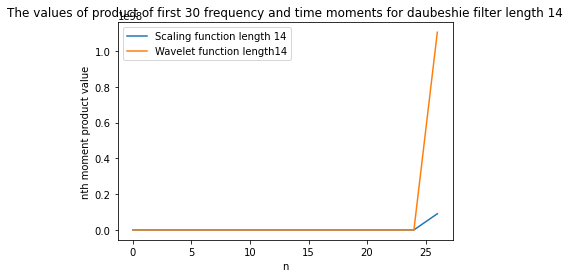

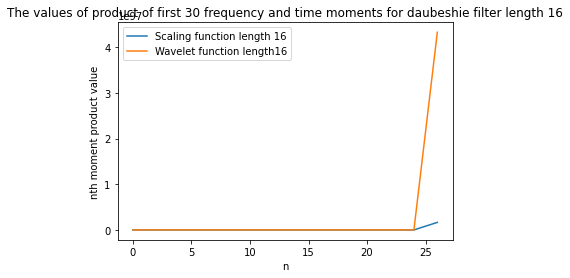

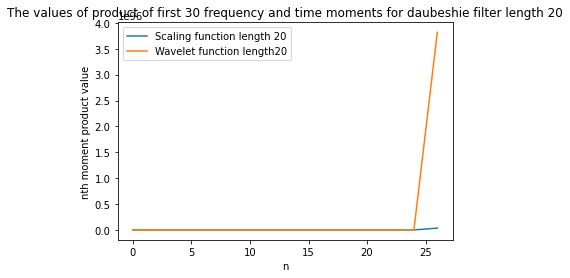

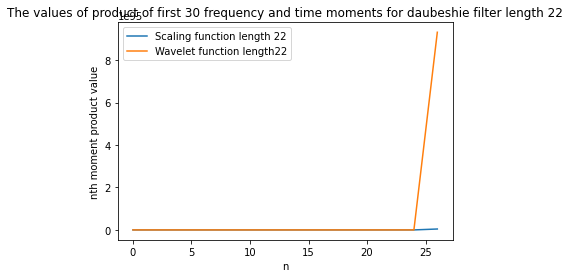

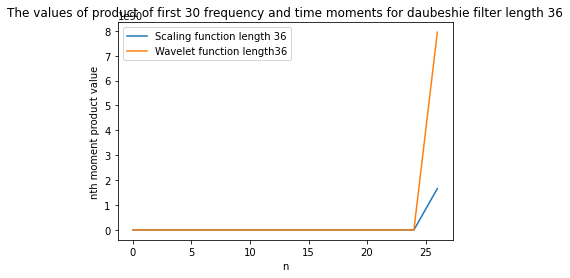

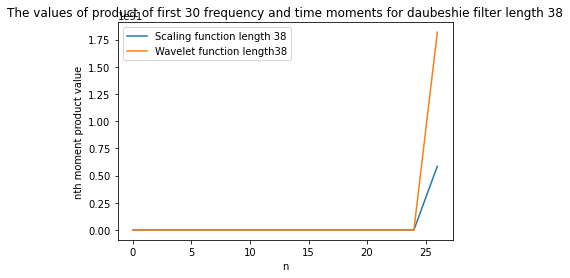

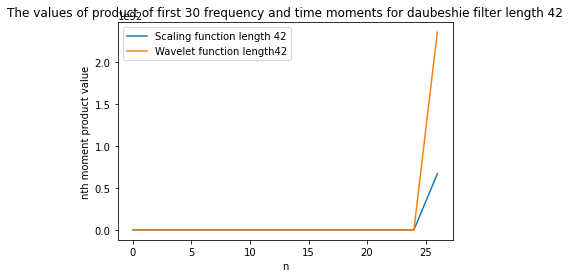

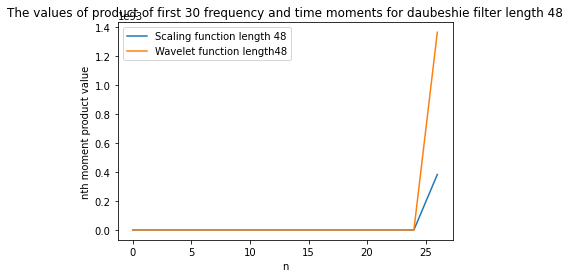

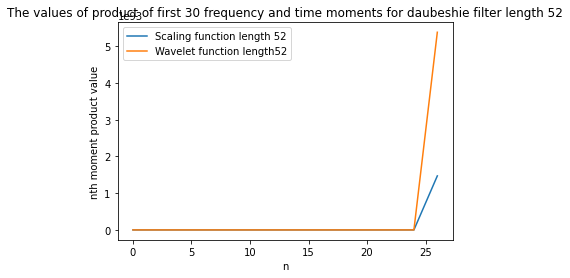

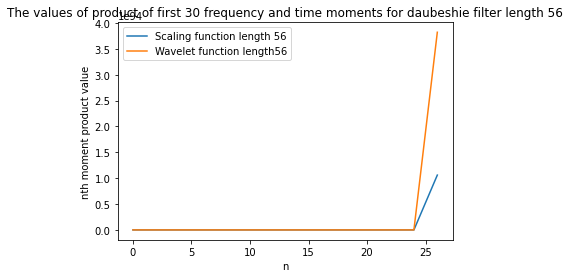

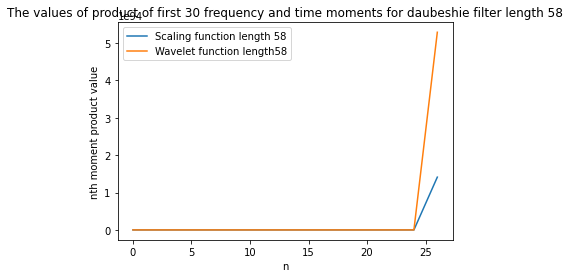

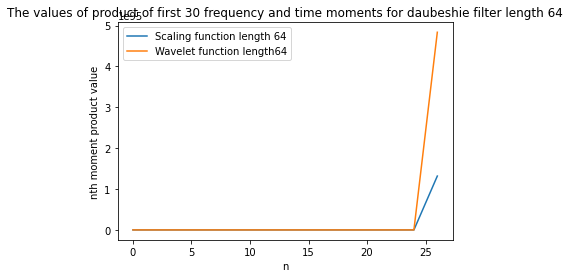

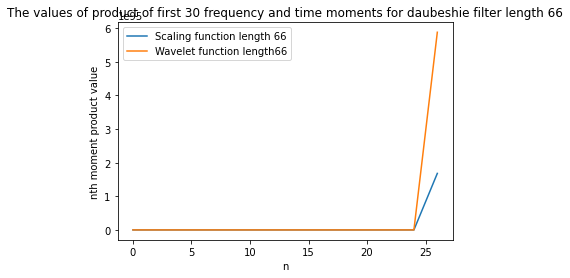

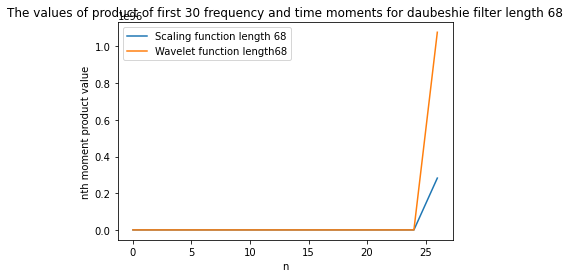

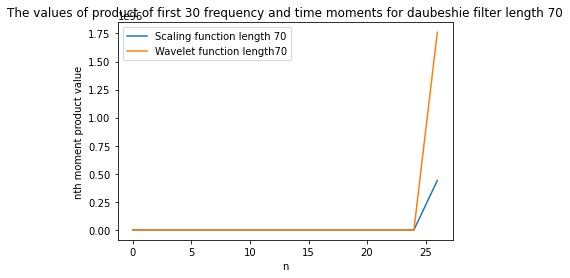

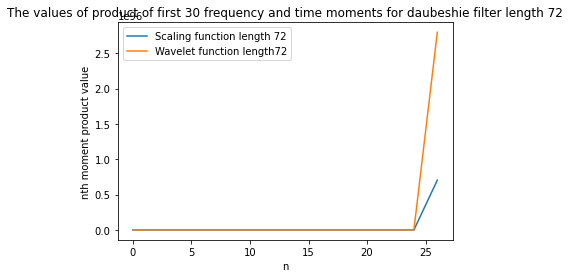

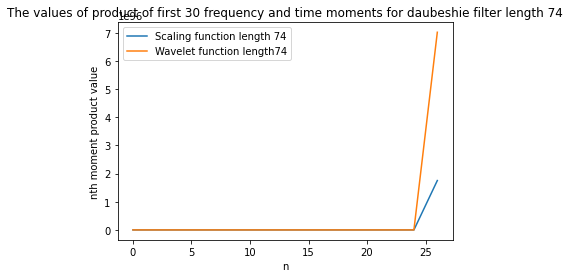

In [373]:
for i in range(38):
    nth_moment_vs_n_prod(i)

In [382]:
def nth_moment_vs_n_prodlog(l):
    moments_scal=[scaling_all_prod[l][i]+0.1 for i in range(29)]
    moments_wav=[wavelets_all_prod[l][i]+0.1 for i in range(29)]
    plt.figure()
    plt.plot([2*i for i in range(14)],np.log(moments_scal[1::2]),label="Scaling function length "+str(2*l+2))
    plt.plot([2*i for i in range(14)],np.log(moments_wav[1::2]),label="Wavelet function length"+str(2*l+2))
    plt.title("Log of values of product of first 30 frequency and time moments for daubeshie filter length "+str(2*l+2))
    plt.xlabel("n")
    plt.ylabel("log(nth moment product value)")
    plt.legend()
    plt.show()

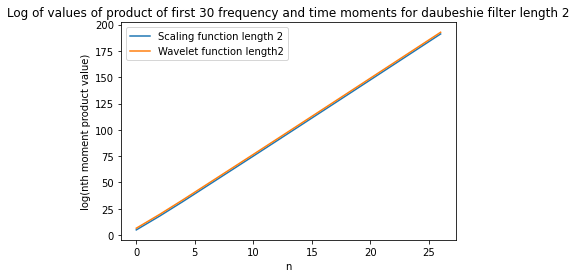

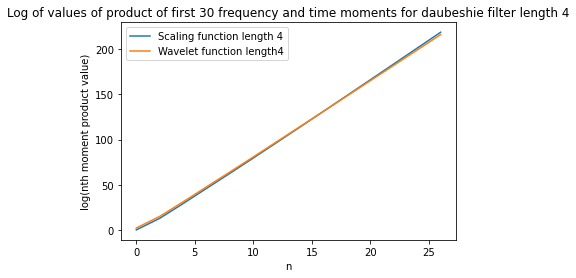

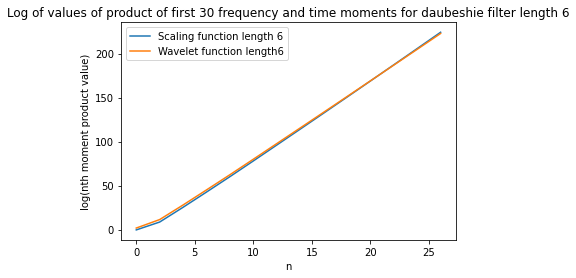

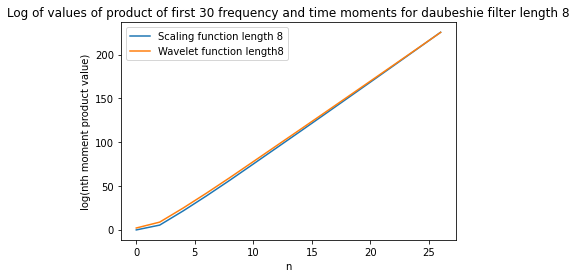

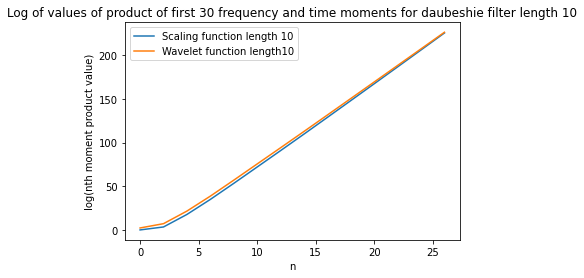

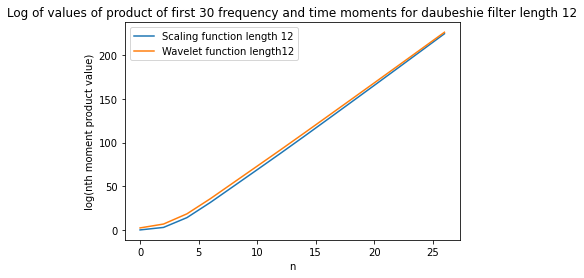

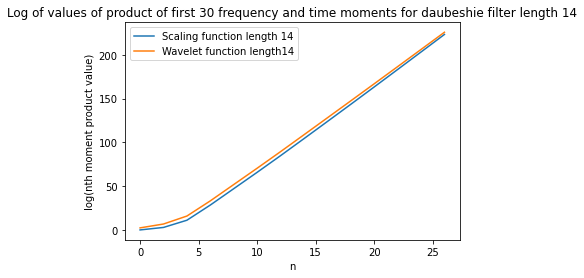

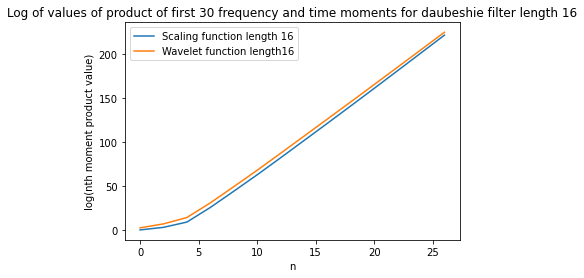

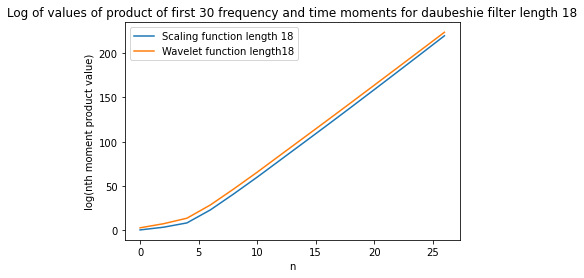

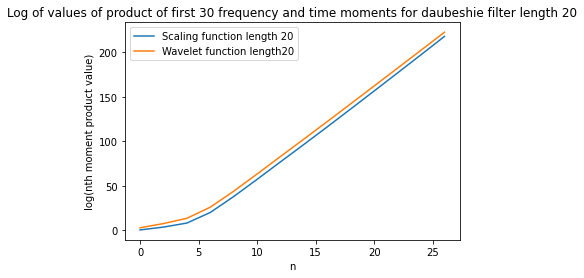

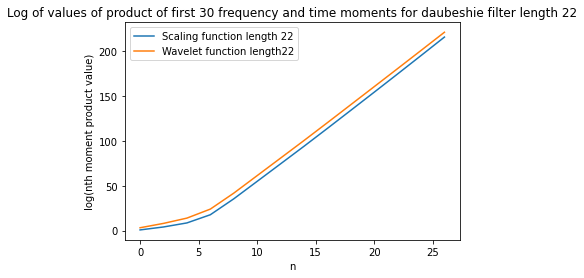

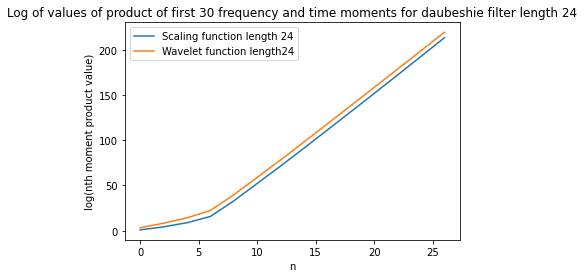

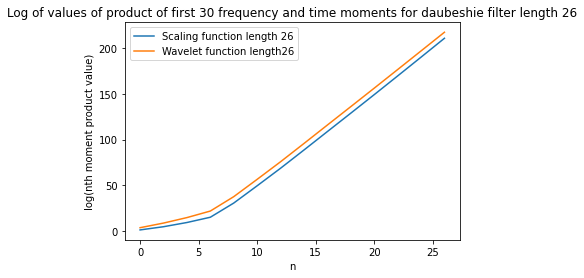

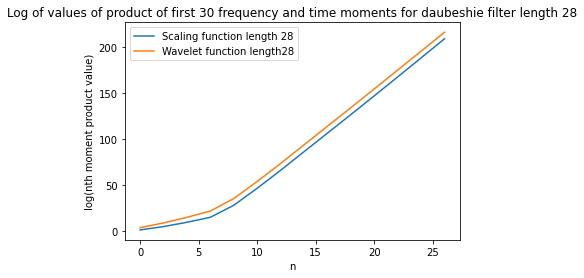

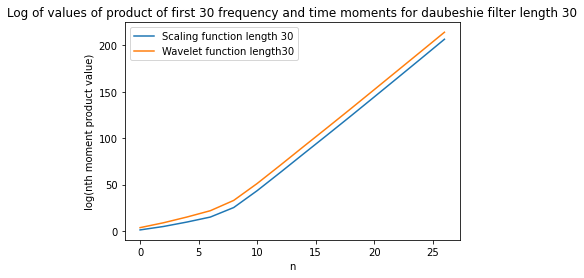

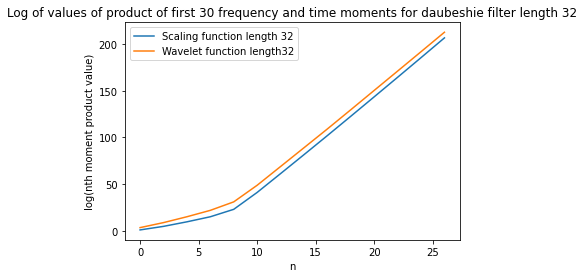

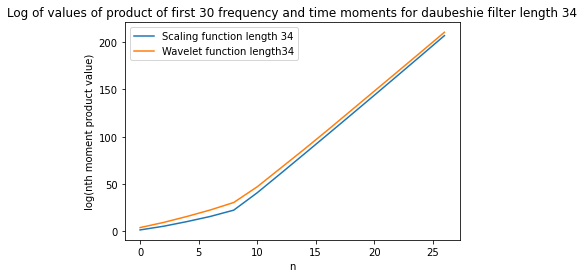

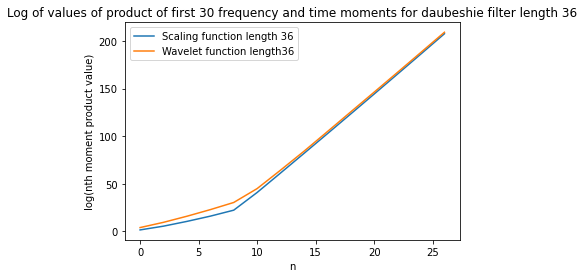

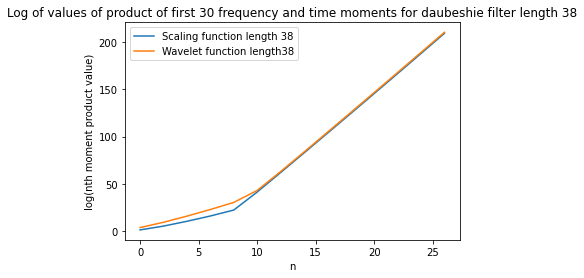

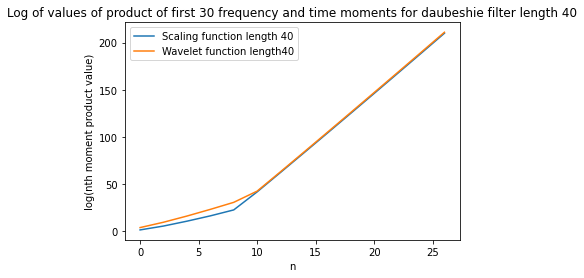

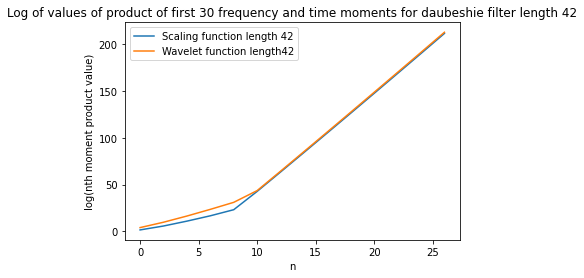

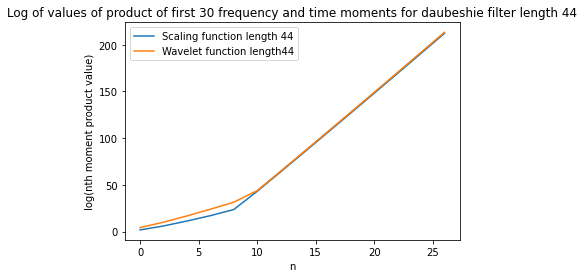

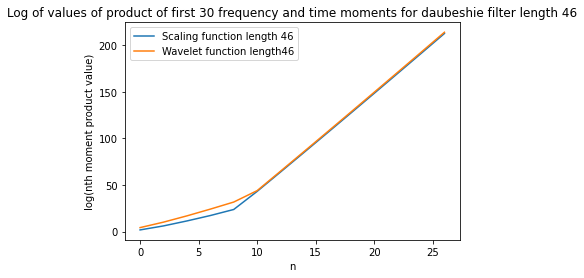

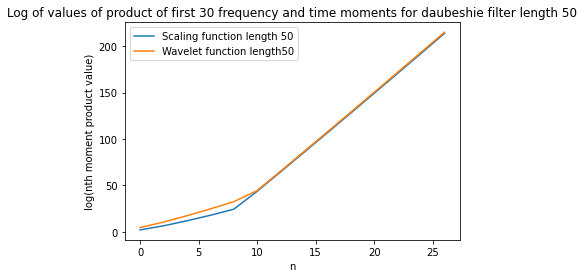

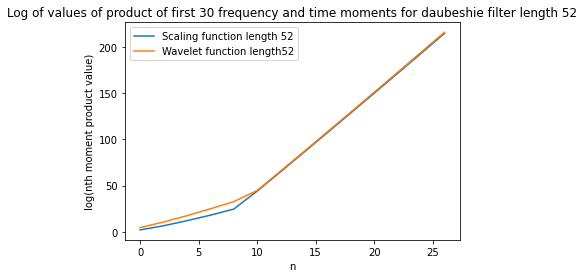

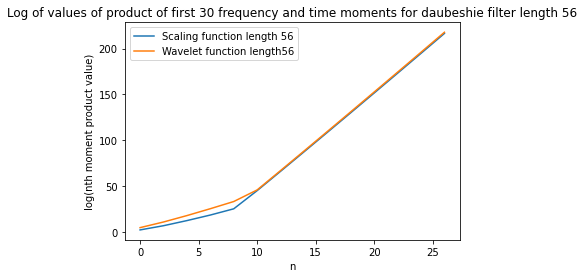

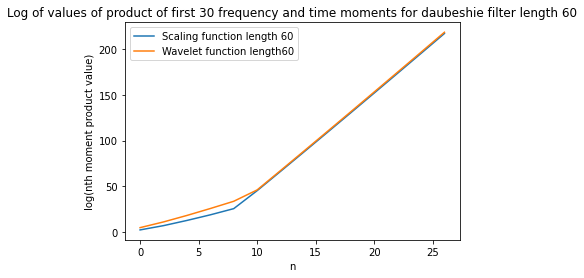

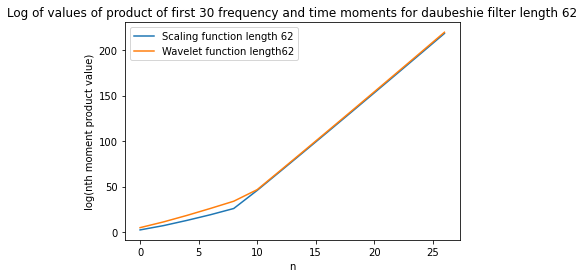

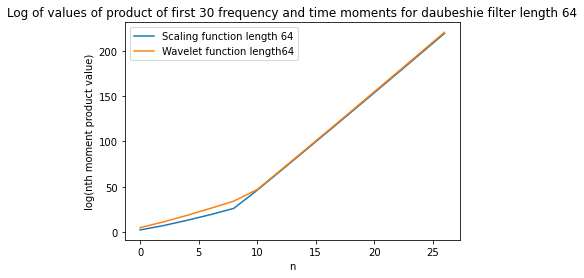

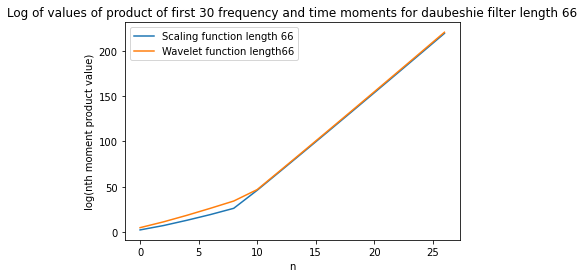

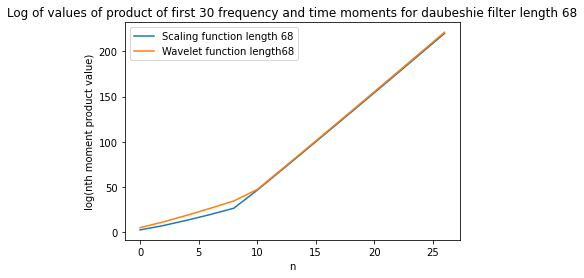

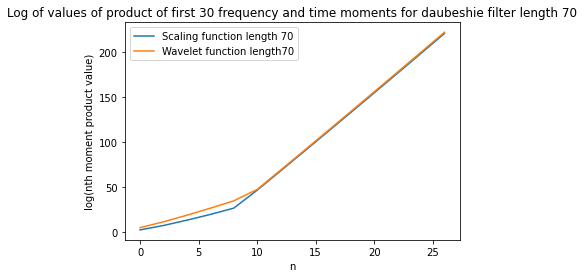

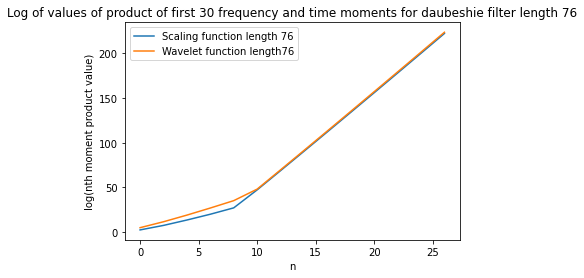

In [383]:
for i in range(38):
    nth_moment_vs_n_prodlog(i)